In [82]:
import pandas as pd
import yfinance as yf

tickers=['AGRO.BA','ALUA.BA','AUSO.BA','BBAR.BA','BHIP.BA','BMA.BA',
         'BOLT.BA','BPAT.BA','BRIO.BA','BYMA.BA','CADO.BA','CAPX.BA',
         'CARC.BA','CECO2.BA','CELU.BA','CEPU.BA','CGPA2.BA','COME.BA',
         'CRES.BA','CTIO.BA','CVH.BA','DGCU2.BA','EDN.BA','FERR.BA',
         'GAMI.BA','GARO.BA','GCLA.BA','GGAL.BA','GRIM.BA','HARG.BA','HAVA.BA',
         'INAG.BA','INTR.BA','INVJ.BA','IRCP.BA','IRSA.BA','LOMA.BA','LEDE.BA',
         'LONG.BA','METR.BA','MIRG.BA','MOLA.BA','MOLI.BA','MORI.BA',
         'OEST.BA','PAMP.BA','PATA.BA','ROSE.BA','SAMI.BA','SEMI.BA',
         'SUPV.BA','TECO2.BA','TGNO4.BA','TGSU2.BA','TRAN.BA','TXAR.BA','YPFD.BA']

tickers_str=" ".join(tickers)
market=yf.Tickers(tickers_str)

market_df = market.history(period="1y")
market_df.head()

[*********************100%%**********************]  57 of 57 completed


Price      Capital Gains               Close                       \
Ticker           BRIO.BA IRCP.BA     AGRO.BA      ALUA.BA AUSO.BA   
Date                                                                
2023-10-18           0.0     0.0  129.523804  1215.779785  1343.5   
2023-10-19           0.0     0.0  122.619049  1080.304321  1296.0   
2023-10-20           0.0     0.0  129.761902  1120.297119  1317.0   
2023-10-23           0.0     0.0  117.500000   903.336365  1217.5   
2023-10-24           0.0     0.0  110.833336   924.832520  1121.0   

Price                                                                ...  \
Ticker          BBAR.BA    BHIP.BA       BMA.BA BOLT.BA     BPAT.BA  ...   
Date                                                                 ...   
2023-10-18  1075.943726  40.851292  1606.692017   18.15  315.595917  ...   
2023-10-19  1001.355591  39.360710  1505.046021   17.35  311.866577  ...   
2023-10-20  1080.395508  41.596584  1577.509766   17.75  310.468079  ...   
2023-10-23  1101.310547  39.966255  1614.793335   17.25  304.874084  ...   
2023-10-24   992.200012  38.429096  1451.469971   16.15  289.956696  ...   

Price        Volume                                                       \
Ticker      ROSE.BA SAMI.BA  SEMI.BA  SUPV.BA TECO2.BA TGNO4.BA TGSU2.BA   
Date                                                                       
2023-10-18  15192.0  173759  1325285  1412970   309180   745409   735590   
2023-10-19   1178.0  114788  1618764   683555   235255   575406   415489   
2023-10-20   3834.0   91610   656345   595168   128189   708646   587236   
2023-10-23   2200.0   55102   424581  1199846   508525   377636   179905   
2023-10-24   6118.0   17189   568105   168522    84647   364205   506499   

Price                                
Ticker     TRAN.BA  TXAR.BA YPFD.BA  
Date                                 
2023-10-18  861322  2758504  765068  
2023-10-19  236708  2386427  461007  
2023-10-20  492822  1660326  344279  
2023-10-23  416829  1805949  396647  
2023-10-24  784017  1588327  437819  

[5 rows x 401 columns]

In [83]:

print("Features per ticker: " ,set([i[0] for i in list(market_df.columns)]))
print("Amount of tickers: ", len(set([i[1] for i in list(market_df.columns)])))


Features per ticker:  {'Capital Gains', 'Dividends', 'Volume', 'Stock Splits', 'Close', 'Low', 'High', 'Open'}
Amount of tickers:  57


In [84]:
market_volume = market_df.Volume
market_volume.isnull().sum()

Ticker
AGRO.BA     0
ALUA.BA     0
AUSO.BA     0
BBAR.BA     0
BHIP.BA     0
BMA.BA      0
BOLT.BA     0
BPAT.BA     0
BRIO.BA     1
BYMA.BA     0
CADO.BA     1
CAPX.BA     0
CARC.BA     1
CECO2.BA    0
CELU.BA     0
CEPU.BA     0
CGPA2.BA    0
COME.BA     0
CRES.BA     0
CTIO.BA     0
CVH.BA      0
DGCU2.BA    0
EDN.BA      0
FERR.BA     0
GAMI.BA     0
GARO.BA     1
GCLA.BA     1
GGAL.BA     0
GRIM.BA     1
HARG.BA     0
HAVA.BA     0
INAG.BA     1
INTR.BA     1
INVJ.BA     0
IRCP.BA     1
IRSA.BA     0
LEDE.BA     0
LOMA.BA     0
LONG.BA     0
METR.BA     0
MIRG.BA     0
MOLA.BA     0
MOLI.BA     0
MORI.BA     0
OEST.BA     1
PAMP.BA     0
PATA.BA     0
ROSE.BA     1
SAMI.BA     0
SEMI.BA     0
SUPV.BA     0
TECO2.BA    0
TGNO4.BA    0
TGSU2.BA    0
TRAN.BA     0
TXAR.BA     0
YPFD.BA     0
dtype: int64

In [85]:
print("Column full of 0: ",any(market_volume.sum() == 0 ))
print("Row full of 0: " ,any(market_volume.transpose().sum() == 0 ))


Column full of 0:  True
Row full of 0:  False


In [86]:
#Removing columns full o 0
market_volume= market_volume.transpose()[market_volume.sum() != 0].transpose()
print("Column full of 0: ",any(market_volume.sum() == 0 ))

Column full of 0:  False


<Axes: title={'center': 'One year total volume'}, ylabel='Ticker'>

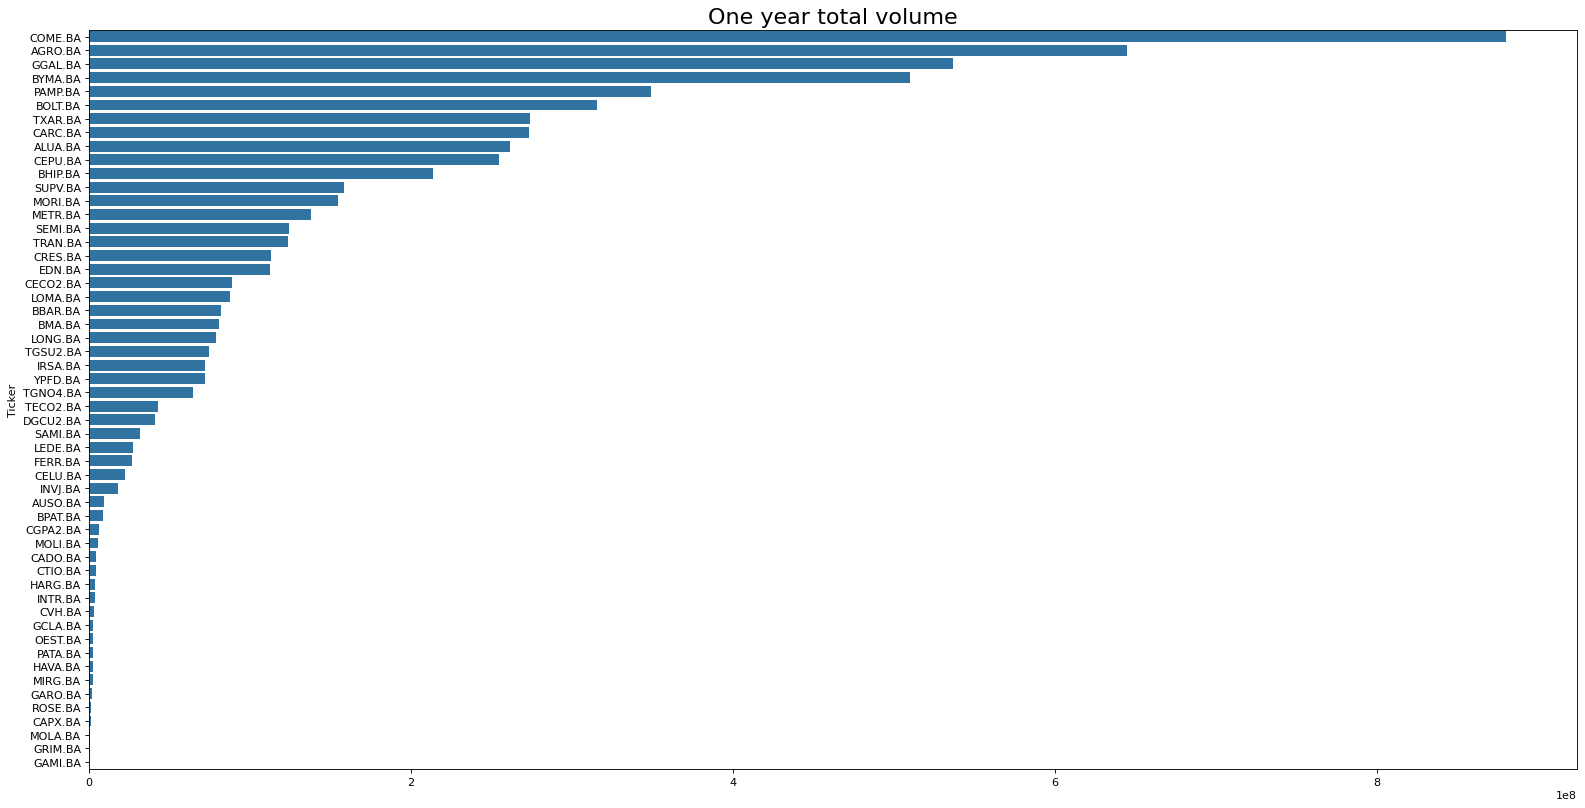

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

market_volume_total = market_volume.sum().sort_values(ascending= False)
plt.figure(figsize=(24, 12), dpi=80)
plt.title("One year total volume" , fontsize=20)
sns.barplot(market_volume_total , orient="h")


C:\Users\PC1\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[[<Axes: title={'center': 'AGRO.BA'}> <Axes: title={'center': 'ALUA.BA'}>
  <Axes: title={'center': 'AUSO.BA'}>]
 [<Axes: title={'center': 'BBAR.BA'}> <Axes: title={'center': 'BHIP.BA'}>
  <Axes: title={'center': 'BMA.BA'}>]
 [<Axes: title={'center': 'BOLT.BA'}> <Axes: title={'center': 'BPAT.BA'}>
  <Axes: title={'center': 'BYMA.BA'}>]
 [<Axes: title={'center': 'CADO.BA'}> <Axes: title={'center': 'CAPX.BA'}>
  <Axes: >]]
[[<Axes: title={'center': 'CARC.BA'}>
  <Axes: title={'center': 'CECO2.BA'}>
  <Axes: title={'center': 'CELU.BA'}>]
 [<Axes: title={'center': 'CEPU.BA'}>
  <Axes: title={'center': 'CGPA2.BA'}>
  <Axes: title={'center': 'COME.BA'}>]
 [<Axes: title={'center': 'CRES.BA'}> <Axes: title={'center': 'CTIO.BA'}>
  <Axes: title={'center': 'CVH.BA'}>]
 [<Axes: title={'center': 'DGCU2.BA'}> <Axes: title={'center': 'EDN.BA'}>
  <Axes: >]]
[[<Axes: title={'center': 'FERR.BA'}> <Axes: title={'center': 'GAMI.BA'}>
  <Axes: title={'center': 'GARO.BA'}>]
 [<Axes: title={'center': 'GCLA

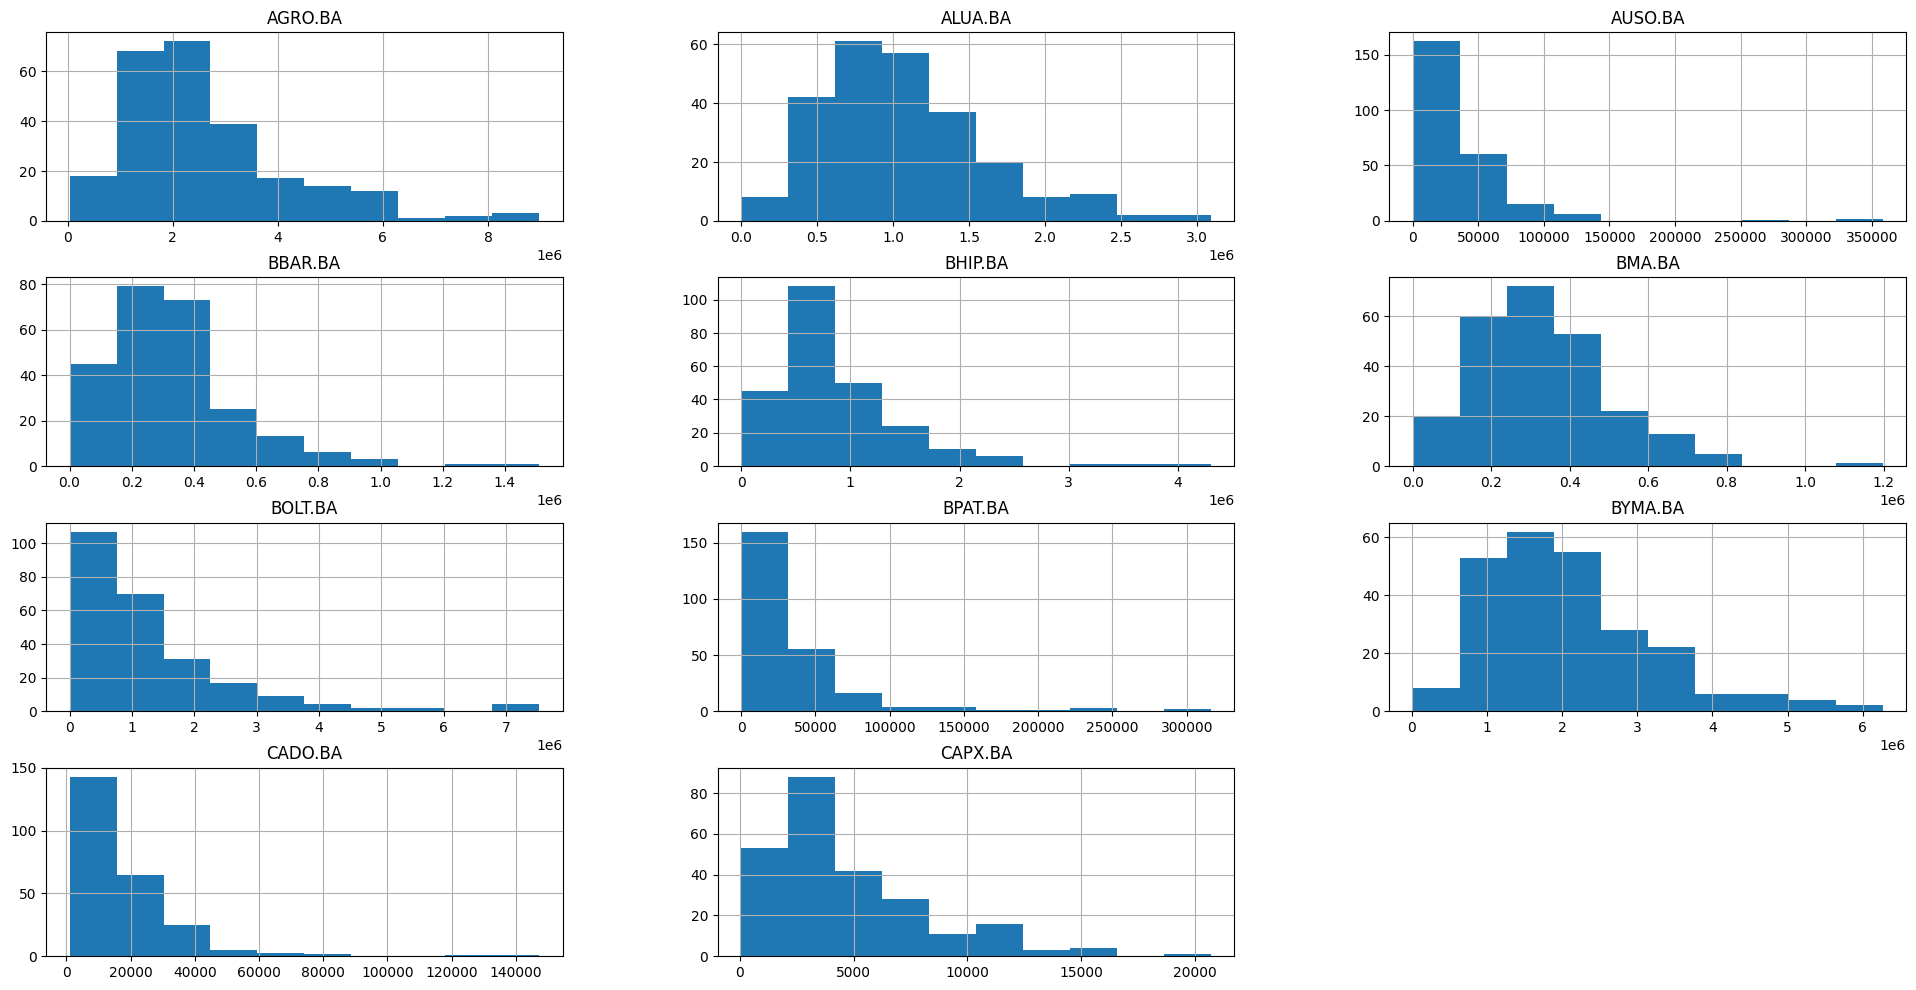

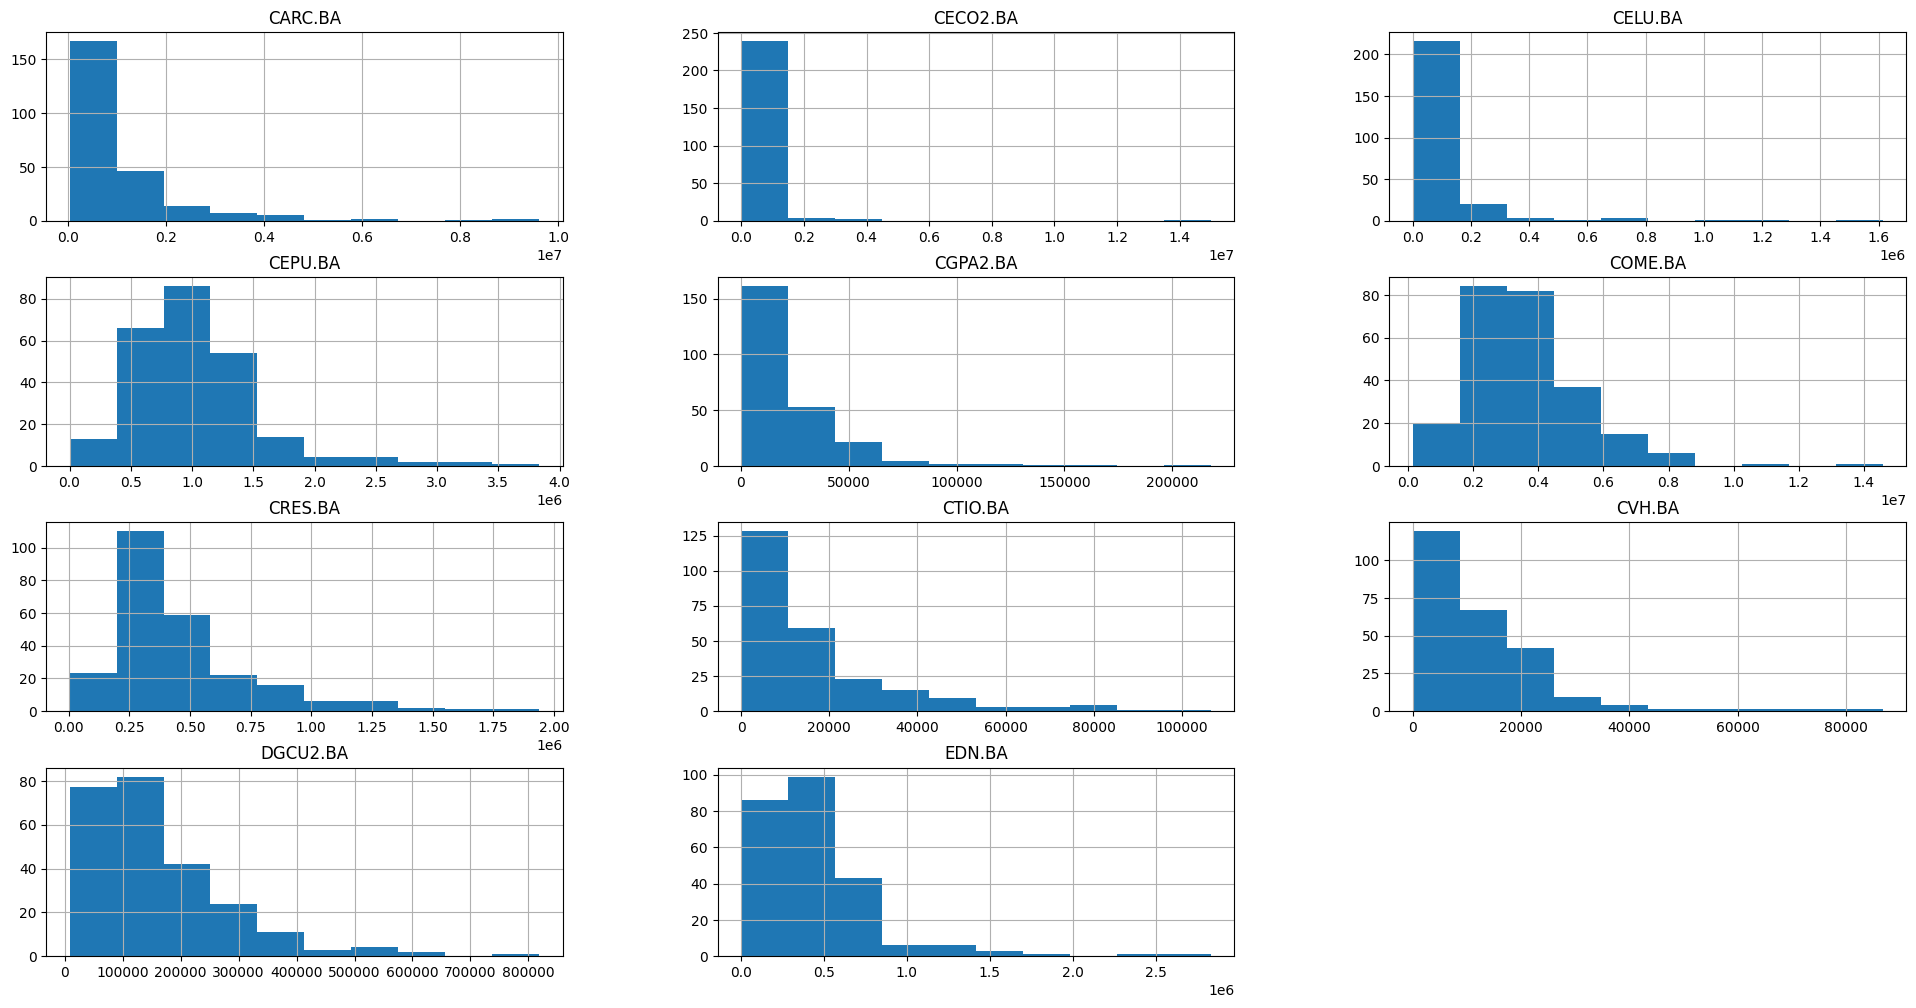

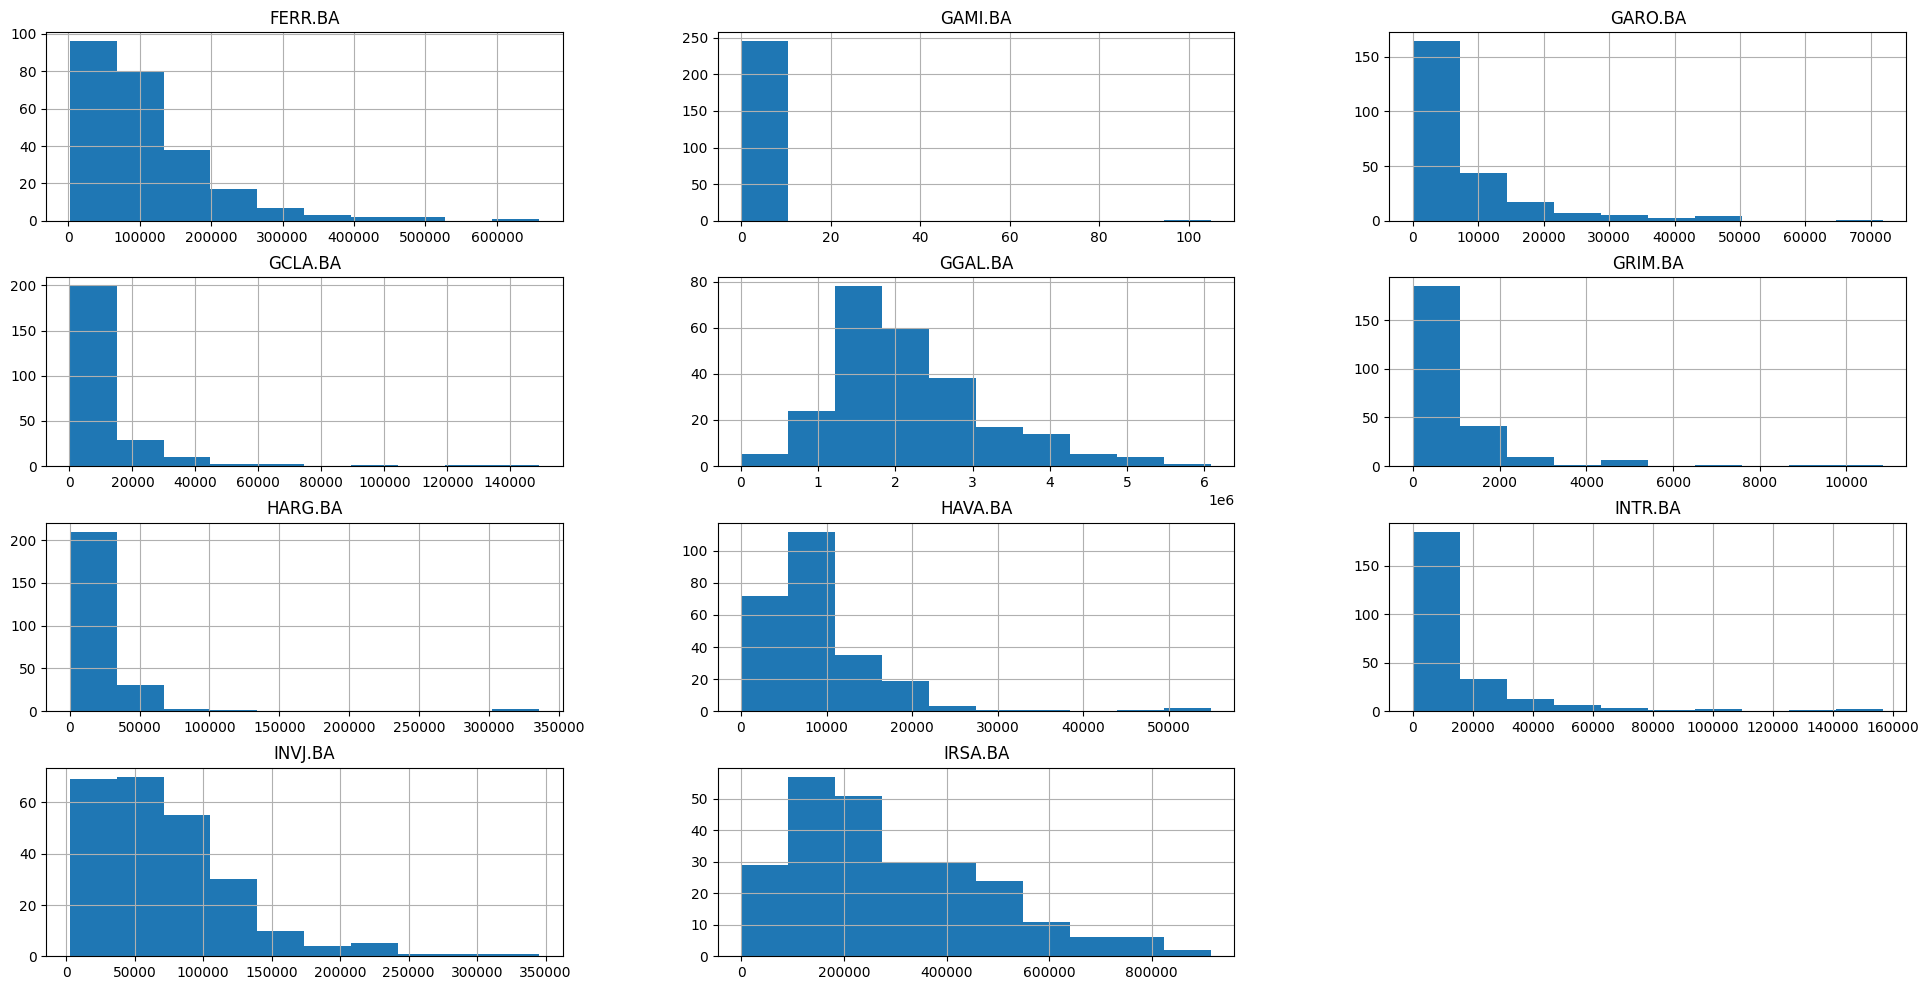

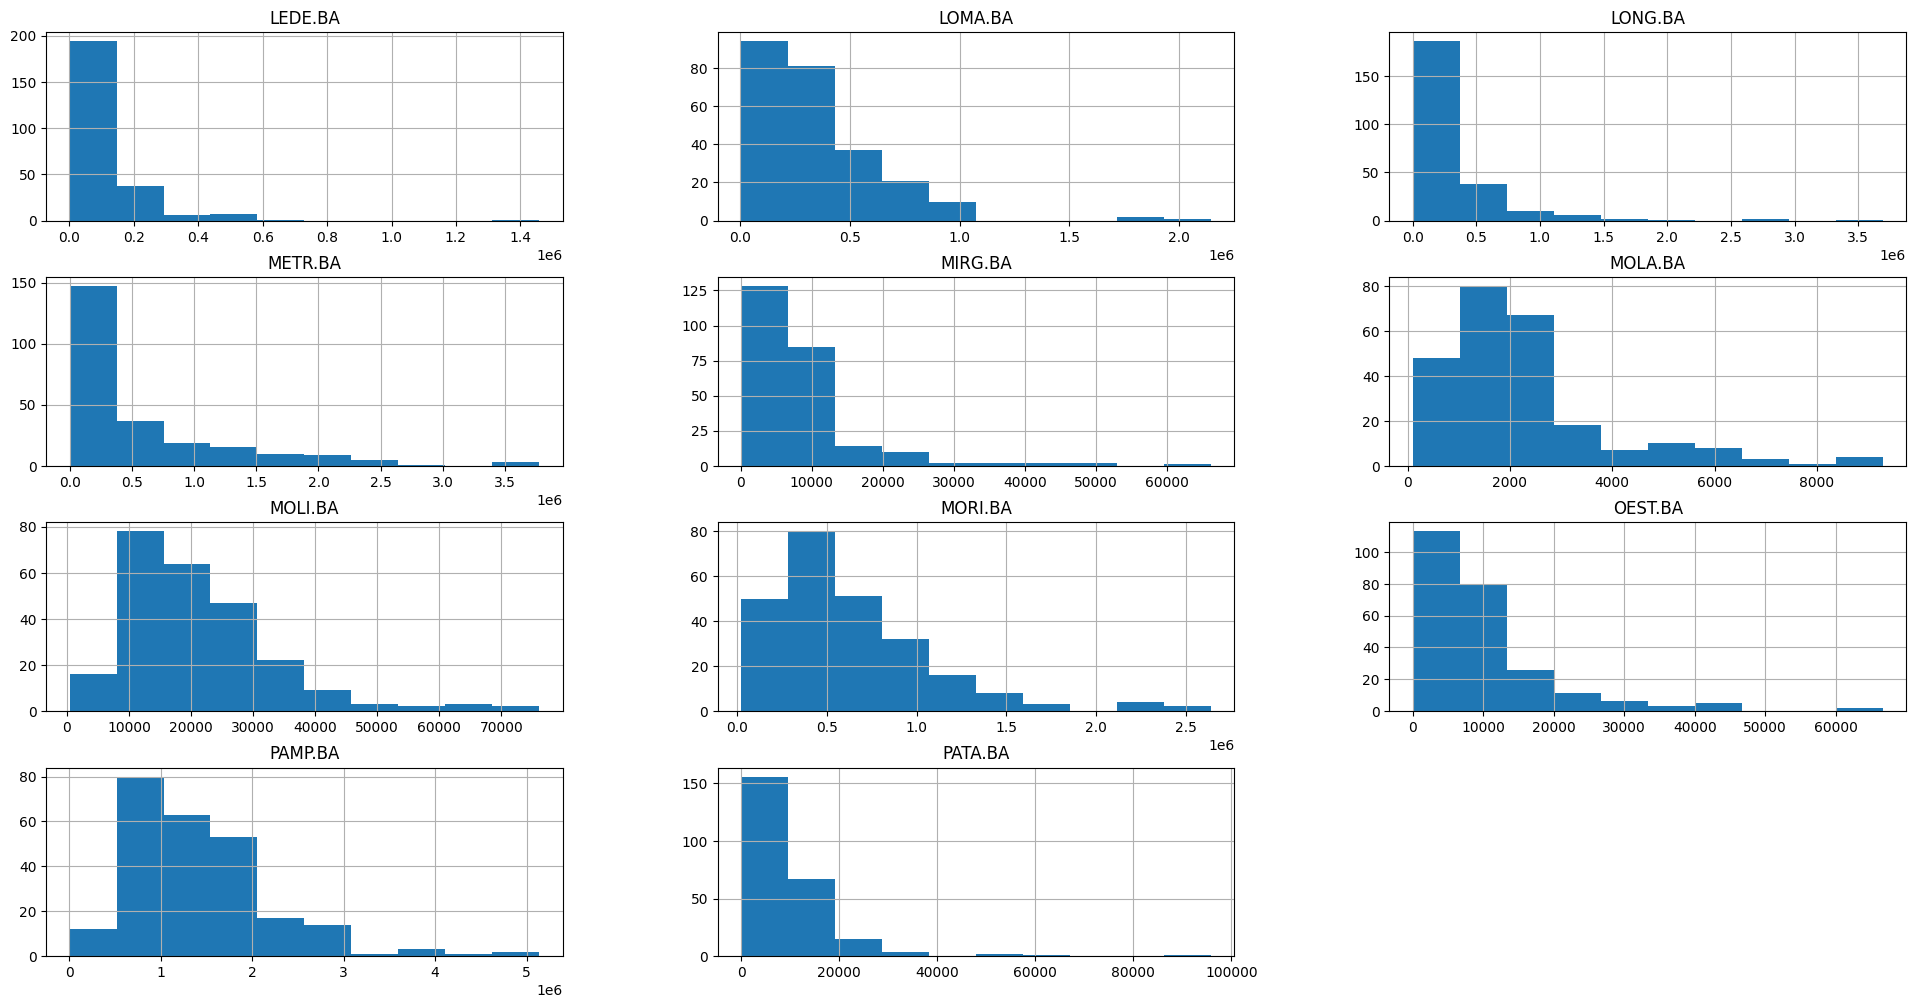

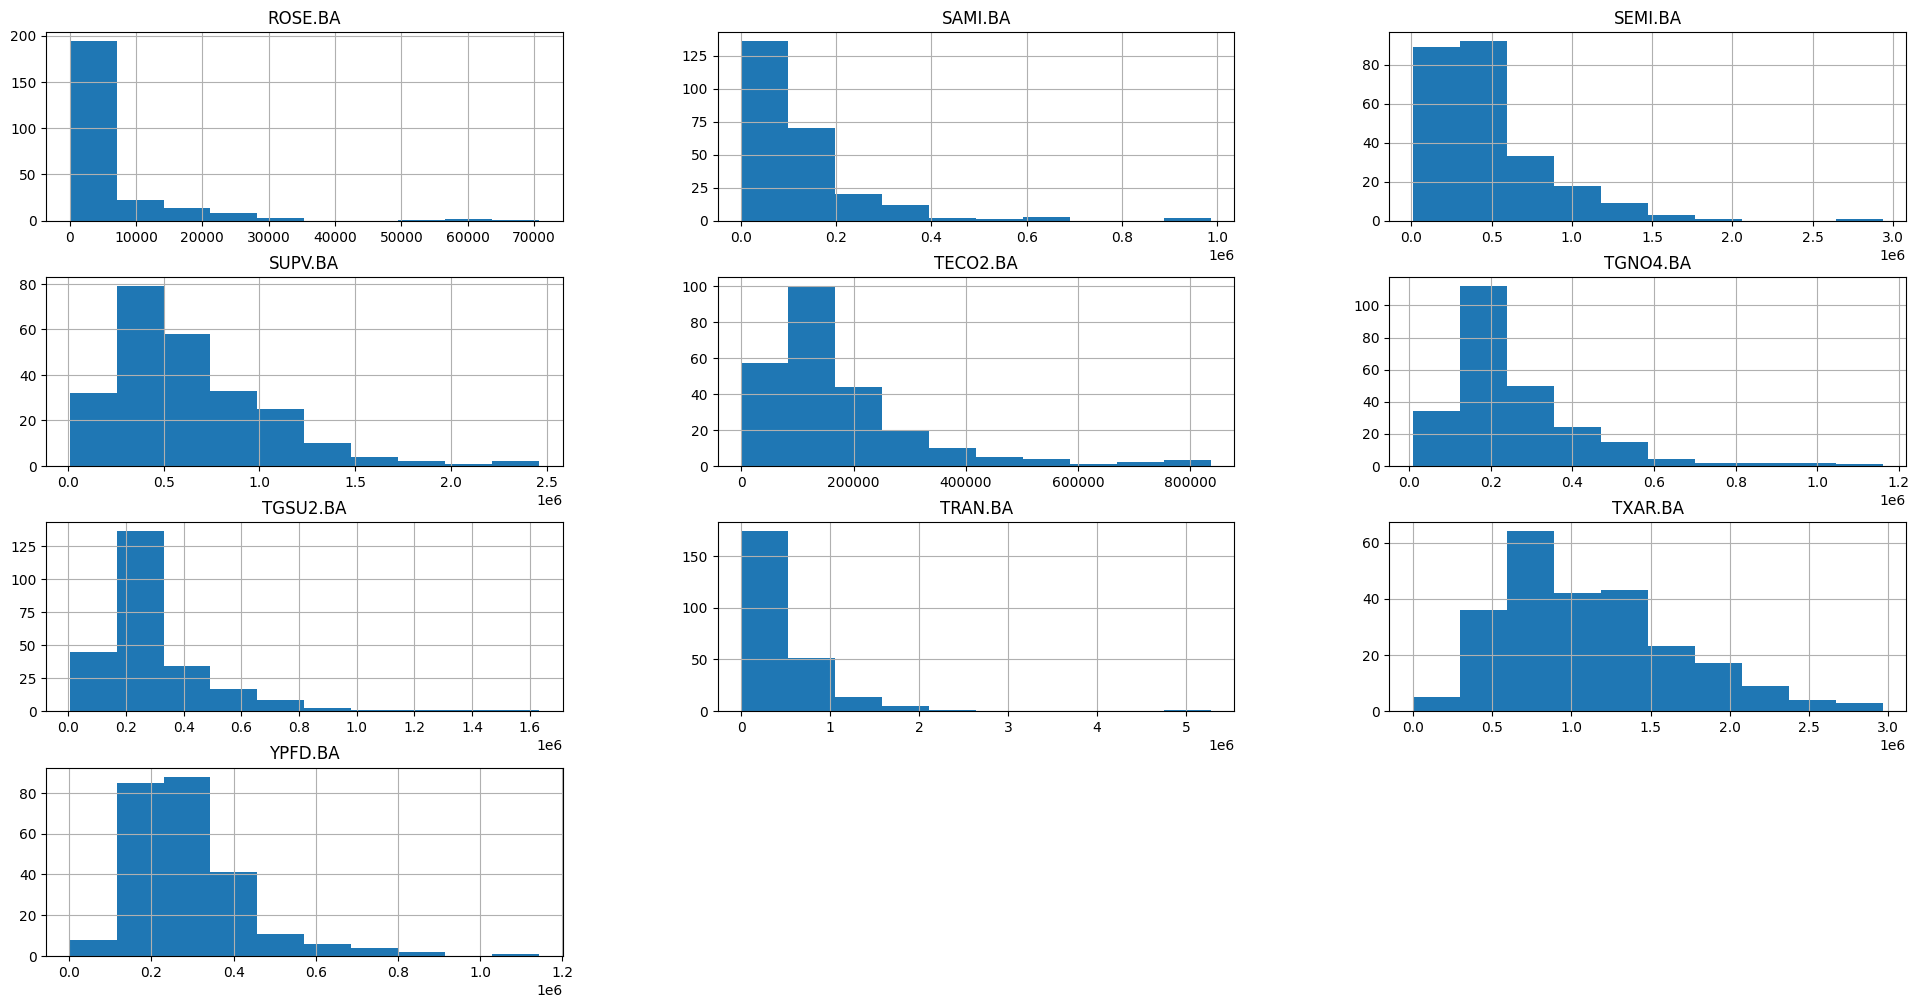

In [88]:
#Distributions of volumes per day
import numpy as np

market_volume_split = np.array_split(market_volume.transpose(), 5)

for i in range(0,5):
       df = pd.DataFrame(market_volume_split[i].transpose())
       print(df.hist(figsize=(24,12)))

C:\Users\PC1\AppData\Local\Temp\ipykernel_11088\806472709.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_volume_corr = market_volume.pct_change().corr()


<Axes: title={'center': 'Correlations'}, xlabel='Ticker', ylabel='Ticker'>

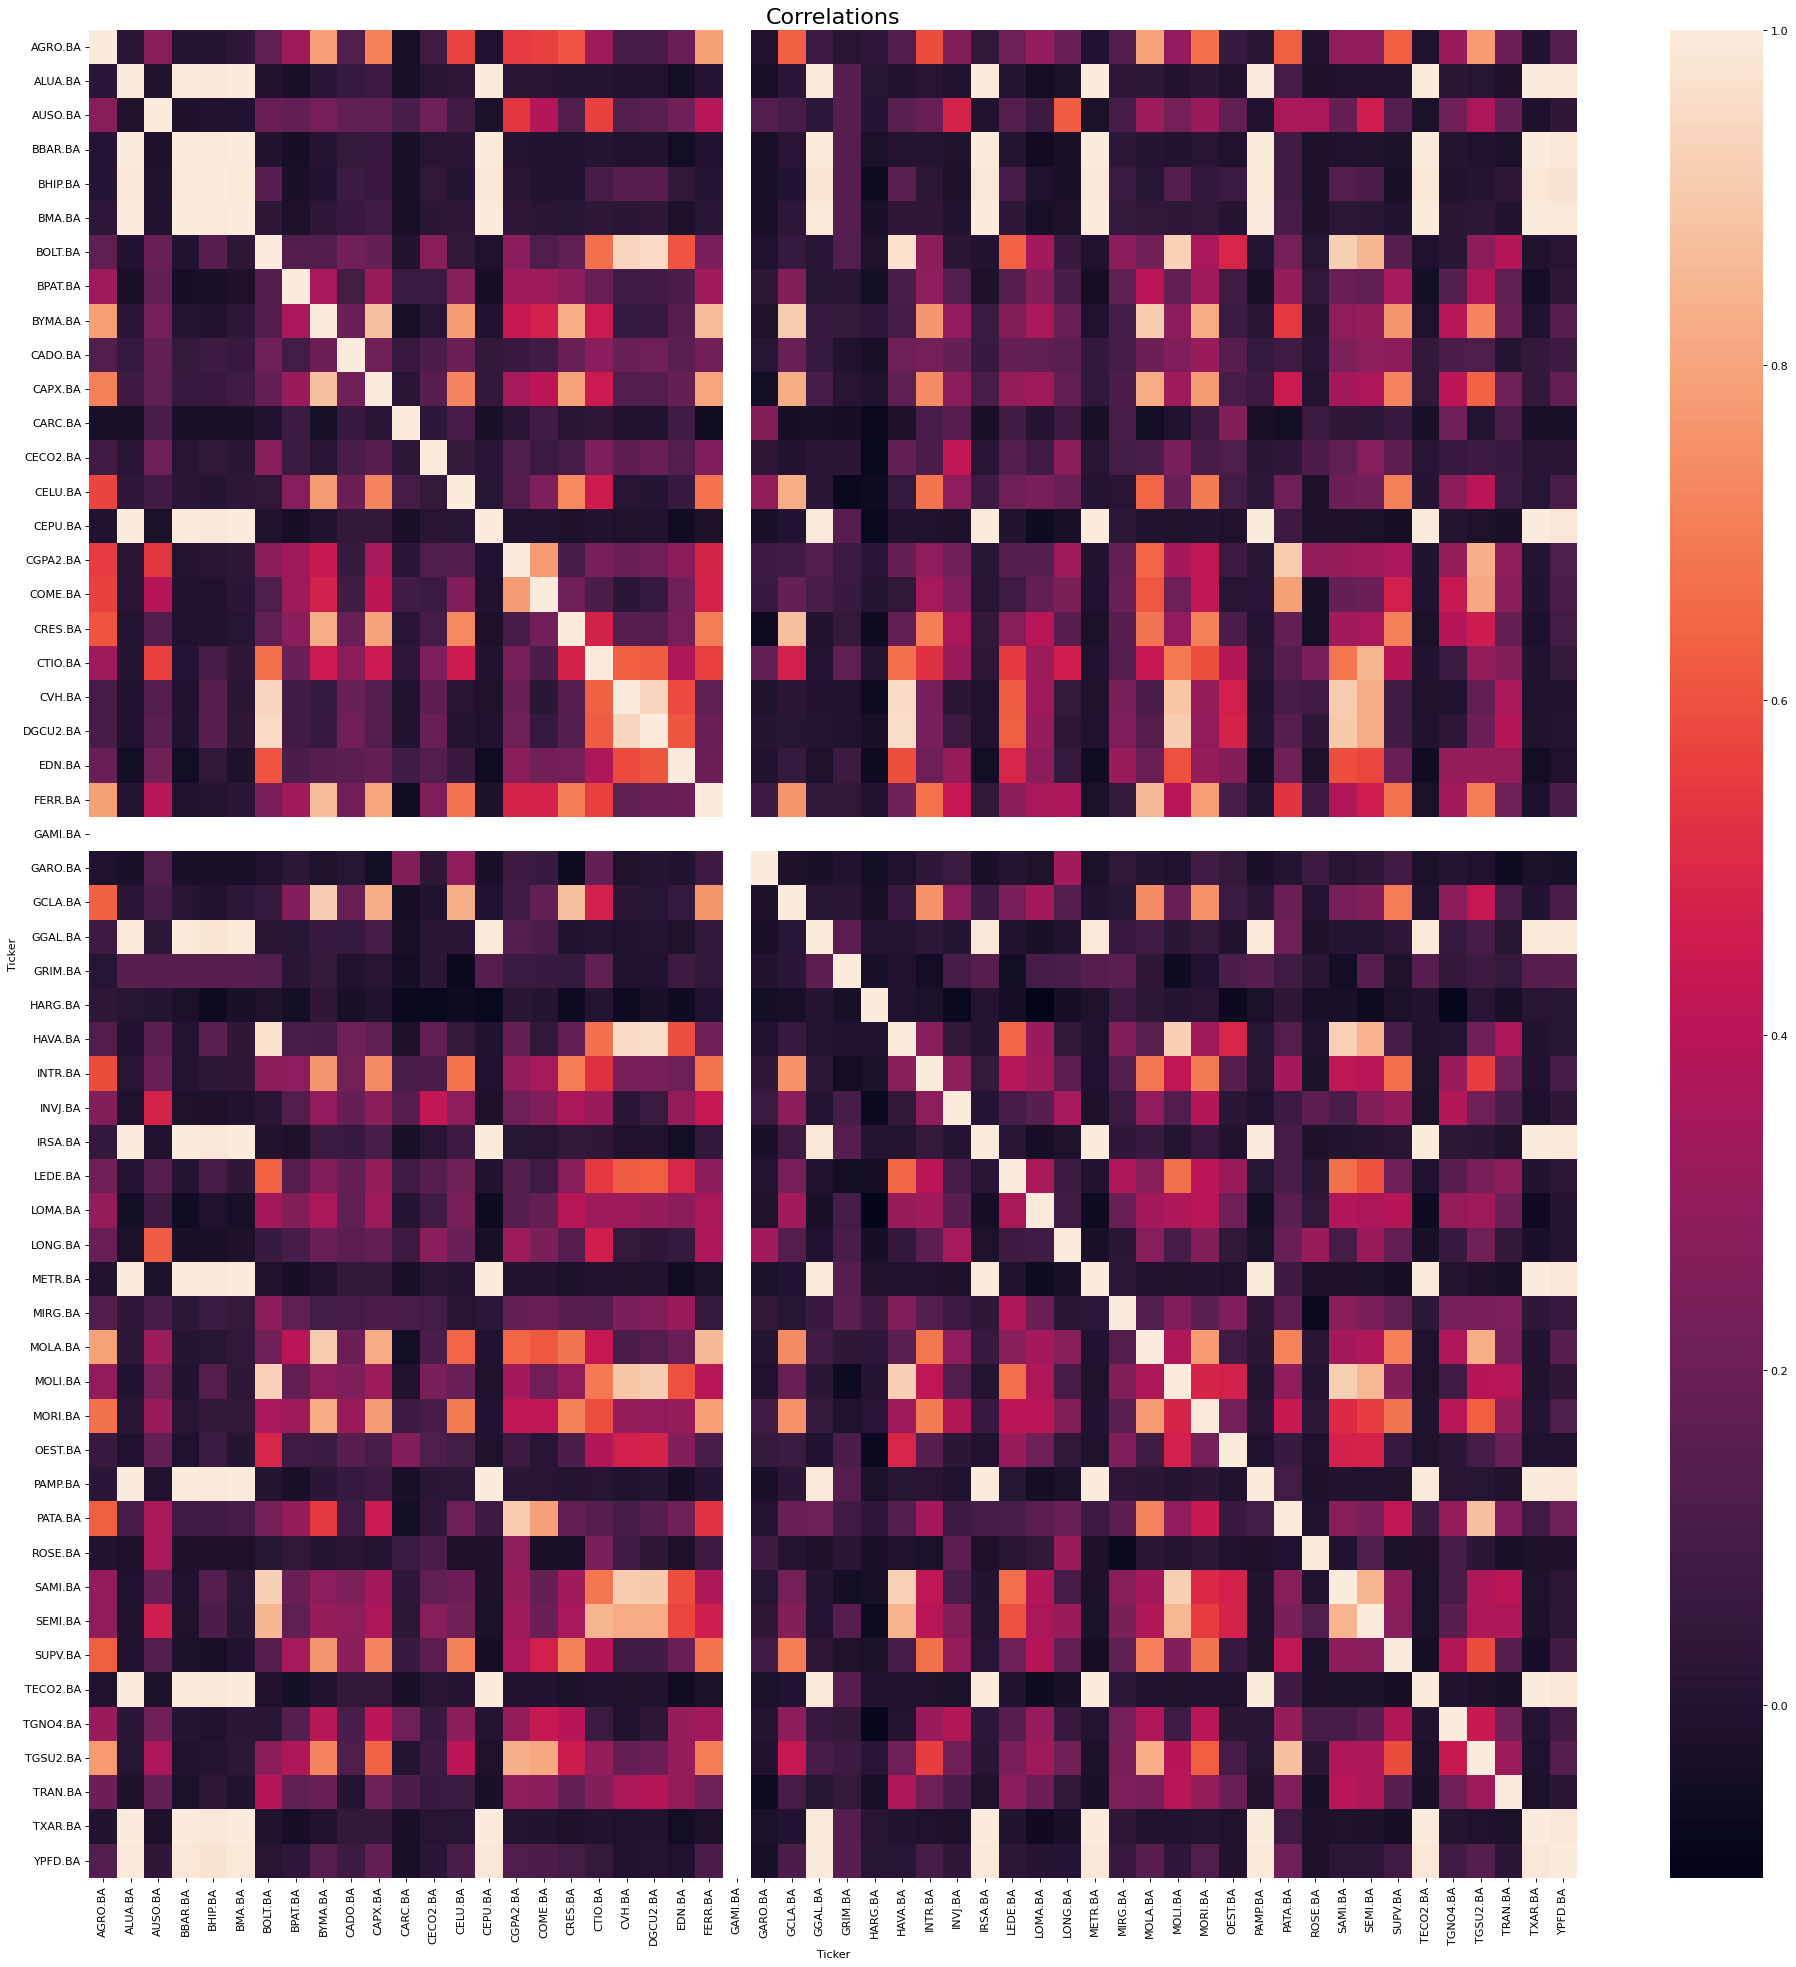

In [89]:
#Volume change correlation matrix
market_volume_corr = market_volume.pct_change().corr() 

plt.figure(figsize=(30, 30), dpi=80)
plt.title( "Correlations", fontsize=20)
sns.heatmap(market_volume_corr )

In [90]:
#Checking GAMI.BA
print(market_volume["GAMI.BA"].sum())

105.0


In [91]:
#GAMI.BA should be removed and update market_volume_corr 
market_volume.drop(columns=["GAMI.BA"] , inplace=True)
market_volume_corr = market_volume.pct_change().corr() 

C:\Users\PC1\AppData\Local\Temp\ipykernel_11088\1840937926.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  market_volume_corr = market_volume.pct_change().corr()


## Correlations of stocks on leading panel against stocks on the general panel.

The leading panel are the main list of stocks from BYMA , and we want to explore the volume change behavior between both groups.

[Text(277.77777777777777, 0.5, 'Leading panel'),
 Text(0.5, 109.77777777777776, 'General panel')]

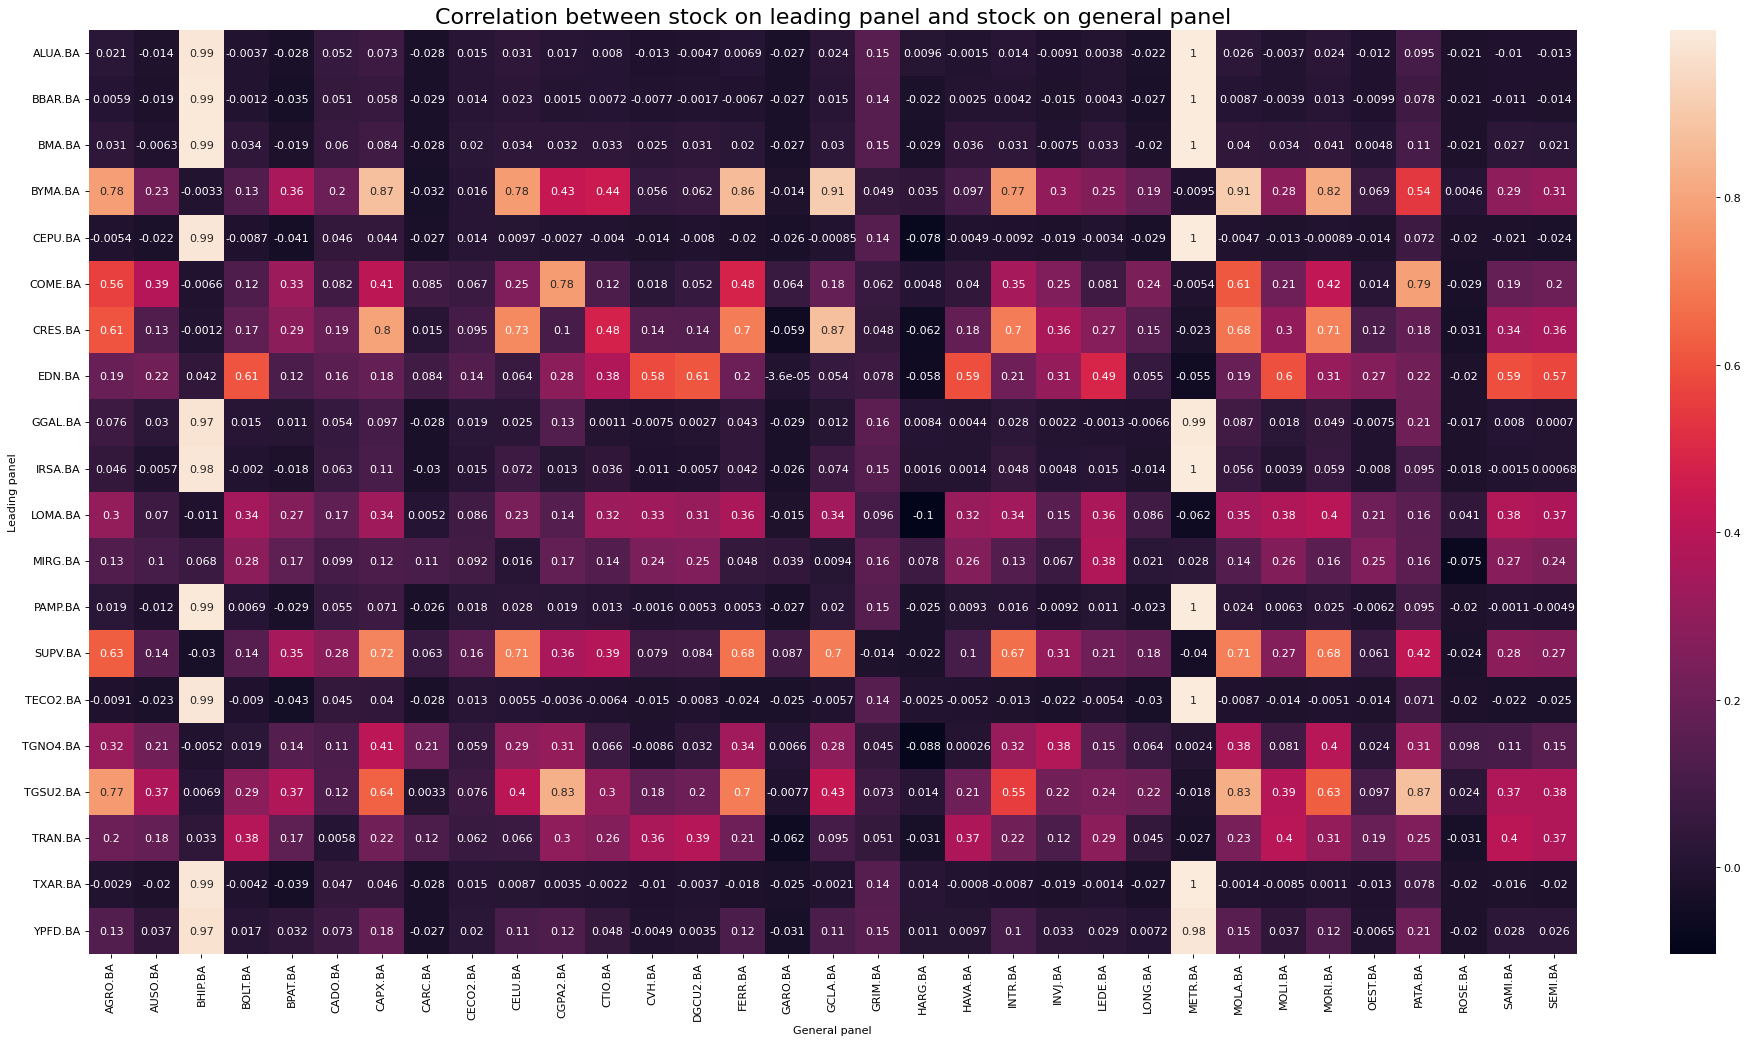

In [92]:

leading_panel= ["ALUA.BA", "BBAR.BA" ,"BMA.BA" ,"BYMA.BA", "CEPU.BA" ,"COME.BA", "CRES.BA", 
                "EDN.BA", "GGAL.BA", "IRSA.BA" ,"LOMA.BA", "MIRG.BA", "PAMP.BA" ,"SUPV.BA",
                 "TECO2.BA", "TGNO4.BA" ,"TGSU2.BA" ,"TRAN.BA","TXAR.BA" , "YPFD.BA"]

#Volume change correlation matrix between both groups
corr_with_panel = market_volume_corr.loc[leading_panel ,  ~market_volume_corr.columns.isin(leading_panel)]

plt.figure(figsize=(30, 15), dpi=80)
plt.title( "Correlation between stock on leading panel and stock on general panel", fontsize=20)
sns.heatmap(corr_with_panel , annot=True).set(ylabel = "Leading panel", xlabel="General panel")


In [93]:
#Statistics of leading panel in correlation matrix
corr_with_panel.transpose().describe()

Ticker,ALUA.BA,BBAR.BA,BMA.BA,BYMA.BA,CEPU.BA,COME.BA,CRES.BA,EDN.BA,GGAL.BA,IRSA.BA,LOMA.BA,MIRG.BA,PAMP.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,YPFD.BA
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.070923,0.065641,0.084431,0.332897,0.057421,0.224687,0.292649,0.250203,0.089443,0.083079,0.213825,0.139623,0.072572,0.290615,0.058055,0.157757,0.326539,0.186393,0.062192,0.114852
std,0.240492,0.241822,0.237520,0.324138,0.244167,0.224505,0.280170,0.216710,0.235936,0.237676,0.150948,0.099380,0.240219,0.258450,0.243633,0.145451,0.270386,0.144429,0.242644,0.231330
min,-0.028065,-0.035313,-0.028997,-0.032318,-0.077747,-0.028640,-0.062463,-0.058421,-0.028707,-0.029904,-0.103336,-0.075153,-0.028559,-0.040480,-0.043001,-0.087922,-0.017728,-0.061979,-0.039430,-0.030586
25%,-0.012121,-0.014358,0.004843,0.056020,-0.020175,0.061640,0.104674,0.077660,0.001137,-0.005672,0.086250,0.067672,-0.006178,0.083553,-0.021513,0.031927,0.097433,0.061940,-0.017973,0.010867
50%,0.006940,0.001537,0.031332,0.254425,-0.008002,0.184414,0.178623,0.198558,0.014807,0.012819,0.265022,0.134215,0.009345,0.266737,-0.008657,0.113073,0.285119,0.202606,-0.002874,0.036657
75%,0.024012,0.014378,0.036127,0.541906,-0.000847,0.351905,0.476280,0.376707,0.053620,0.059353,0.340418,0.240415,0.023643,0.420390,-0.002538,0.309604,0.433932,0.297472,0.008731,0.123864
max,0.999101,0.999764,0.997618,0.910297,0.999970,0.788730,0.874786,0.609464,0.987666,0.996856,0.397081,0.376859,0.999314,0.716299,0.999974,0.408102,0.870867,0.403631,0.999923,0.983910


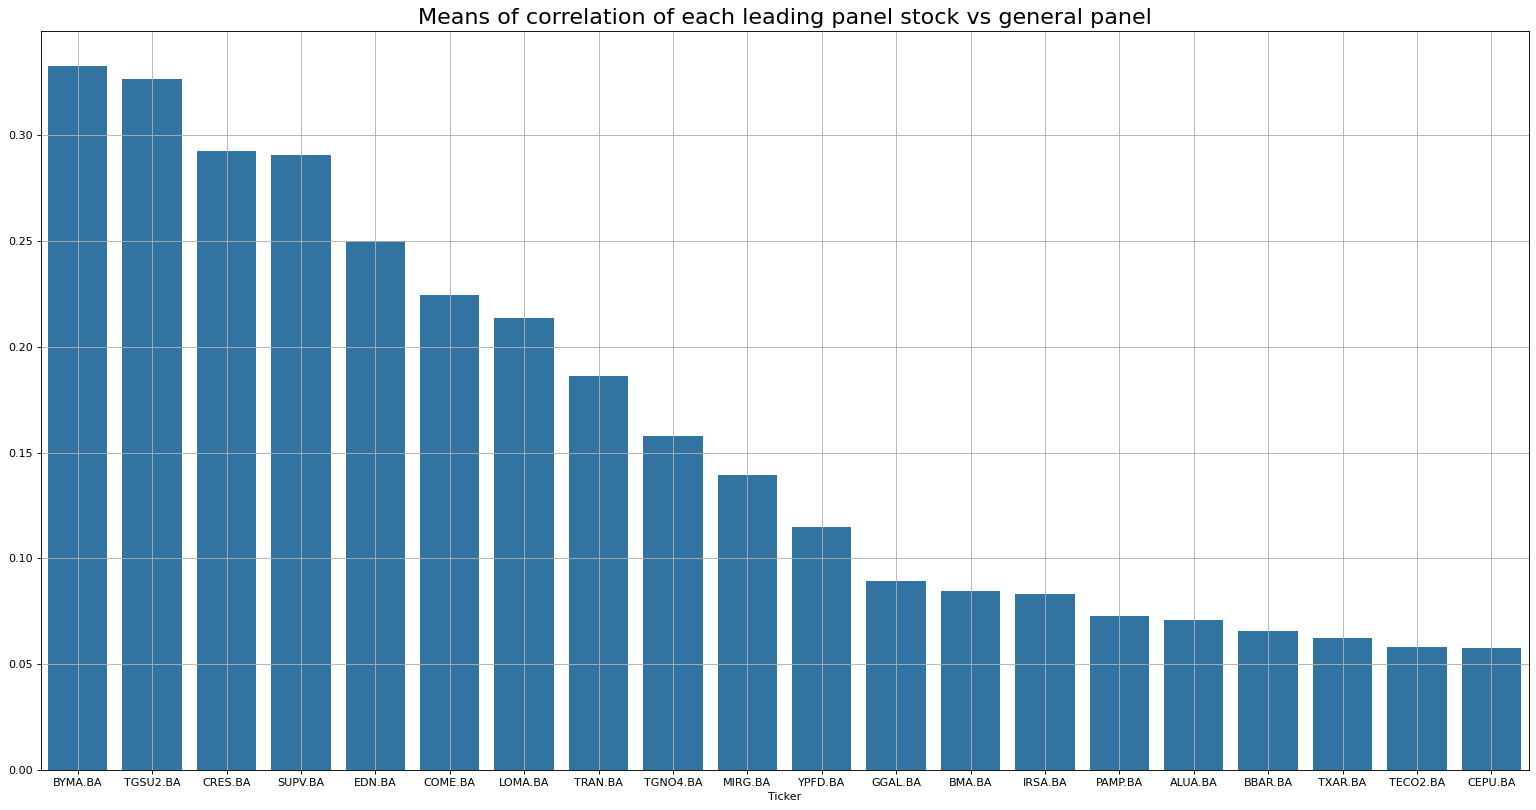

In [94]:
plt.figure(figsize=(24, 12), dpi=80)
plt.title("Means of correlation of each leading panel stock vs general panel" ,fontsize=20)
sns.barplot(corr_with_panel.transpose().mean().sort_values(ascending=False))
plt.grid()

In [95]:
#Statistics of general panel stocks vs leading
corr_with_panel.describe()

Ticker,AGRO.BA,AUSO.BA,BHIP.BA,BOLT.BA,BPAT.BA,CADO.BA,CAPX.BA,CARC.BA,CECO2.BA,CELU.BA,...,LONG.BA,METR.BA,MOLA.BA,MOLI.BA,MORI.BA,OEST.BA,PATA.BA,ROSE.BA,SAMI.BA,SEMI.BA
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.240022,0.099123,0.496538,0.126421,0.116968,0.098375,0.274762,0.019102,0.050916,0.194327,...,0.052867,0.487722,0.269746,0.160409,0.257733,0.060987,0.250186,-0.012017,0.160310,0.158899
std,0.275705,0.130664,0.500435,0.171417,0.157922,0.068912,0.274187,0.068629,0.045343,0.259514,...,0.092712,0.522252,0.307138,0.185015,0.274352,0.096243,0.233473,0.034270,0.190083,0.187247
min,-0.009142,-0.022670,-0.030222,-0.009034,-0.043001,0.005825,0.039852,-0.032318,0.013098,0.005550,...,-0.030092,-0.061823,-0.008657,-0.014438,-0.005108,-0.014180,0.070576,-0.075153,-0.022048,-0.025287
25%,0.020388,-0.012318,-0.001695,-0.001384,-0.028189,0.051651,0.072270,-0.027887,0.015268,0.024399,...,-0.022447,-0.019146,0.025469,0.002037,0.024735,-0.008447,0.094889,-0.021895,-0.003738,-0.006818
50%,0.129338,0.053276,0.519234,0.026282,0.073932,0.067639,0.149121,-0.026463,0.020215,0.065267,...,0.014245,0.506187,0.144965,0.058883,0.139757,0.009454,0.168863,-0.020289,0.067633,0.089202
75%,0.376551,0.190945,0.986257,0.198197,0.270042,0.132699,0.408885,0.068494,0.078577,0.259629,...,0.100721,0.999154,0.436286,0.284856,0.403024,0.102172,0.266349,-0.018061,0.304028,0.323845
max,0.782061,0.390898,0.990285,0.607169,0.374269,0.280964,0.874680,0.207884,0.162134,0.776546,...,0.241856,0.999974,0.906884,0.595892,0.815967,0.267147,0.870867,0.098209,0.594083,0.574150


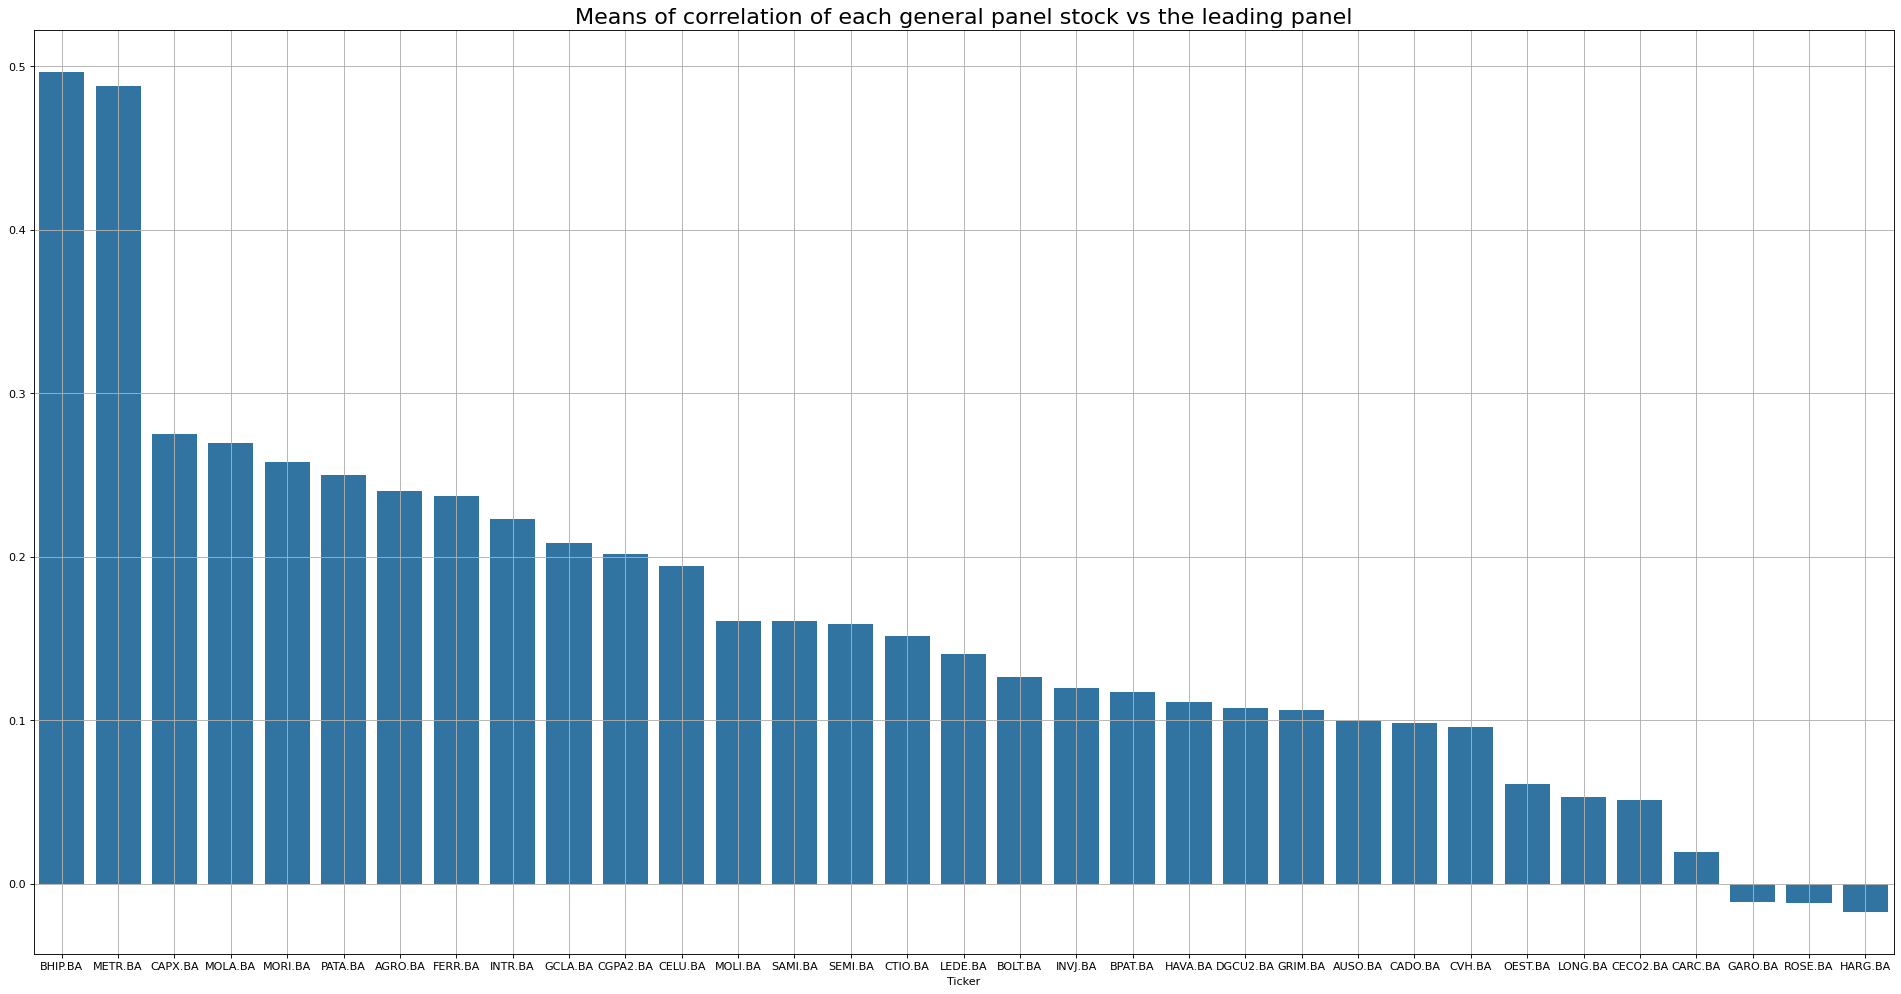

In [96]:
plt.figure(figsize=(30, 15), dpi=80)
plt.title("Means of correlation of each general panel stock vs the leading panel" , fontsize=20)
sns.barplot(corr_with_panel.mean().sort_values(ascending=False))
plt.grid()

## Exploring leading panel total volume against general panel total volume throughout the year

In [97]:
#Dividing market_volume in both groups
leadpanel_volume_d = market_volume[leading_panel].transpose().sum()
generalpanel_volume_d= market_volume.loc[:,~(market_volume.columns.isin(leading_panel))].transpose().sum()

#Dataframe with total volume per day of both groups
volumes_d = pd.concat([leadpanel_volume_d , generalpanel_volume_d], axis=1)
volumes_d.rename(columns={0 : "Volume leading panel" , 1 : "Volume general panel"} , inplace=True)

volumes_d.head()

,Volume leading panel,Volume general panel
Date,,
2023-10-18,30881134.0,5879227.0
2023-10-19,28205668.0,4741040.0
2023-10-20,26277845.0,4782236.0
2023-10-23,26615001.0,2381246.0
2023-10-24,22110532.0,2042908.0


In [98]:
volumes_d.describe()

,Volume leading panel,Volume general panel
count,2.460000e+02,2.460000e+02
mean,1.687482e+07,9.184261e+06
std,5.469284e+06,4.295092e+06
min,3.228890e+05,1.978840e+05
25%,1.359312e+07,6.627798e+06
50%,1.615163e+07,8.784186e+06
75%,1.995542e+07,1.109439e+07
max,3.807000e+07,3.175415e+07


<Axes: >

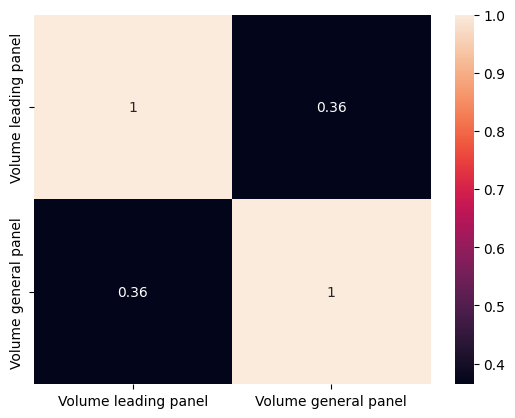

In [99]:
#Correlation between both groups
sns.heatmap(volumes_d.corr() , annot=True)

<Axes: title={'center': 'Volumes throughout the year'}, xlabel='Date'>

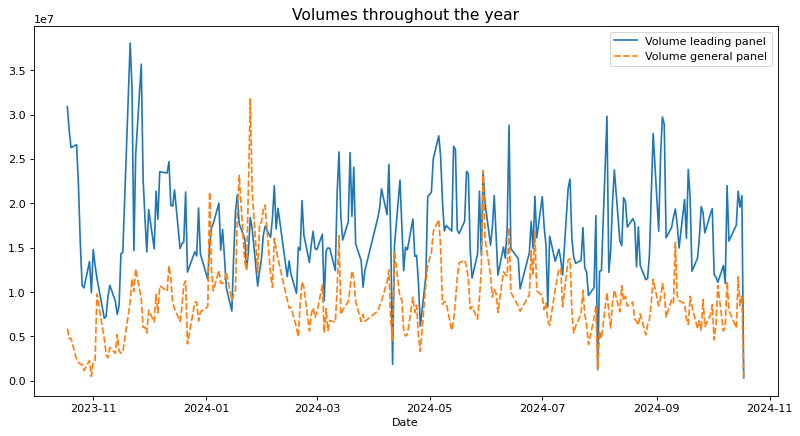

In [100]:
plt.figure(figsize=(12, 6), dpi=80)
plt.title( "Volumes throughout the year", fontsize=14)
sns.lineplot(volumes_d)

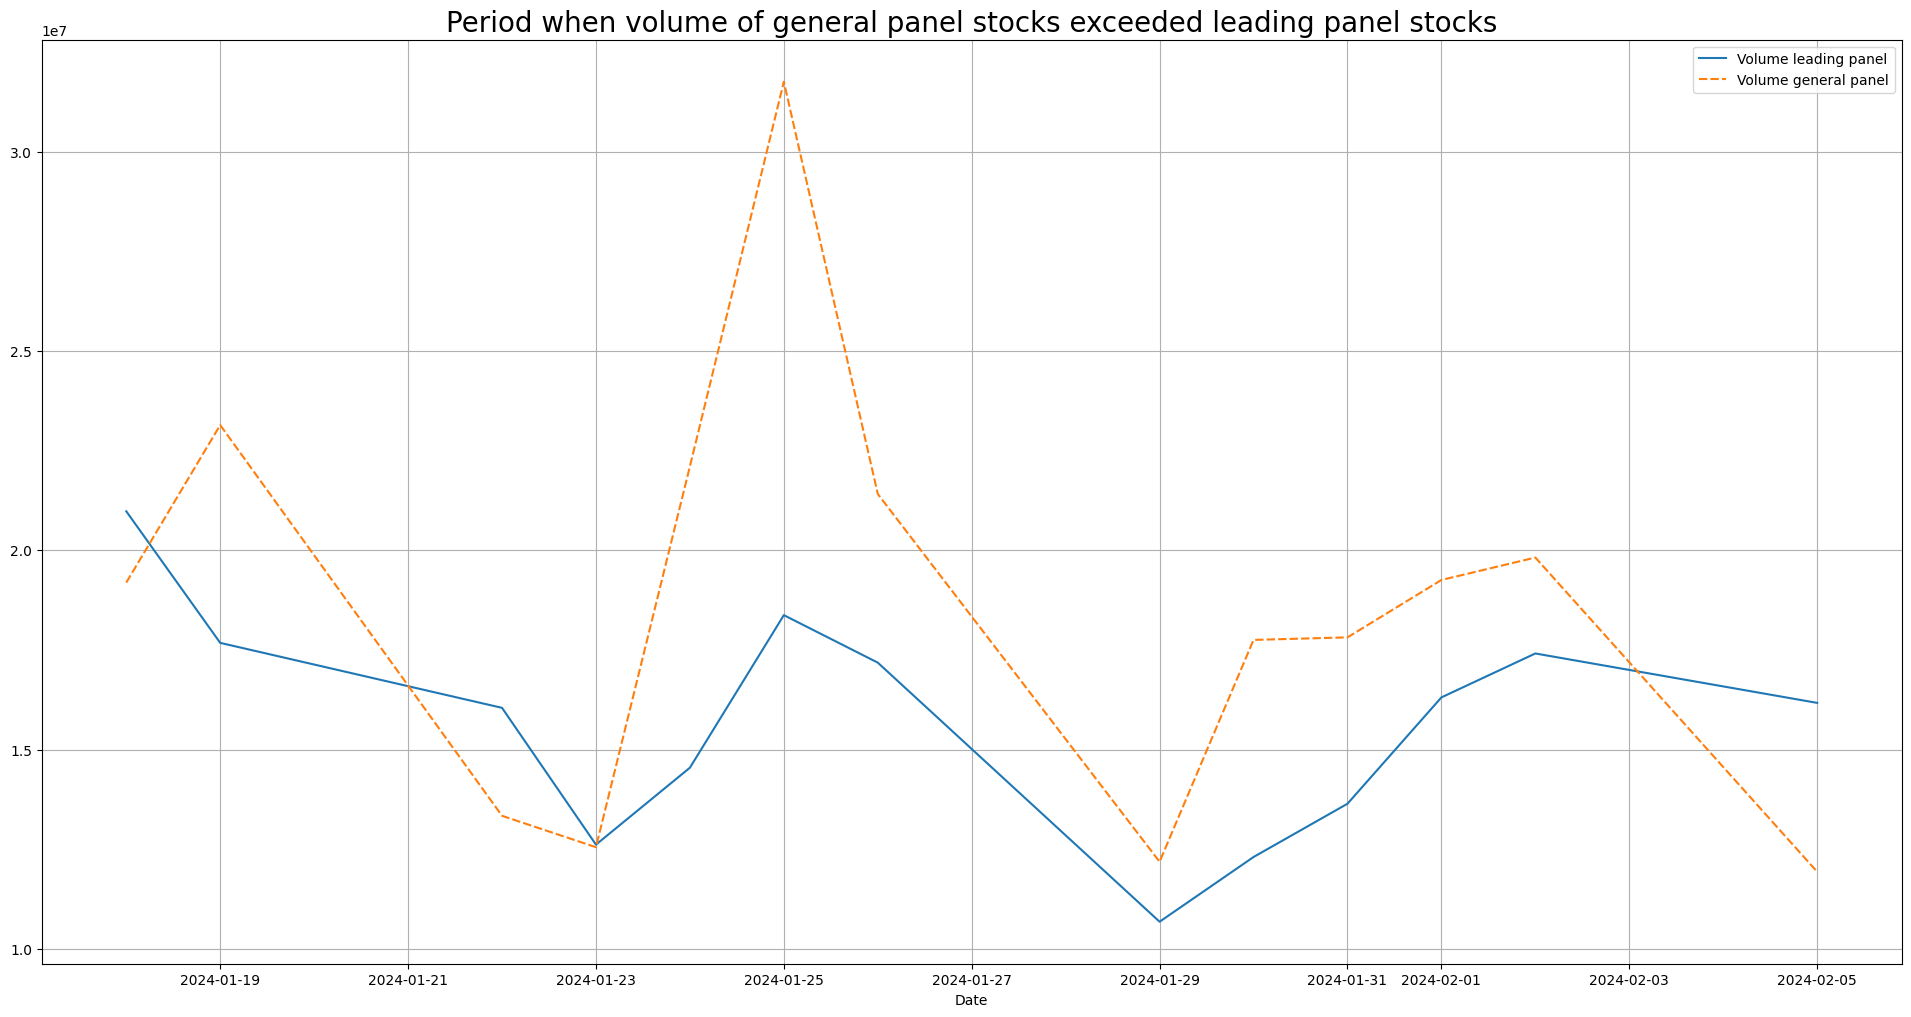

In [101]:
plt.figure(figsize=(24,12))
plt.title("Period when volume of general panel stocks exceeded leading panel stocks" , fontsize=20)
sns.lineplot(volumes_d.loc["2024-01-18" : "2024-02-05"])
plt.grid()

In [102]:
#general panel stocks along the period.
generalpanel_period = market_volume.loc["2024-01-18" : "2024-02-05", ~(market_volume.columns.isin(leading_panel))].sum().sort_values(ascending=False) 

#general panel stocks at the highest pike of the period.
generalpanel_at_pike = market_volume.loc["2024-01-25", ~(market_volume.columns.isin(leading_panel))].sort_values(ascending=False)

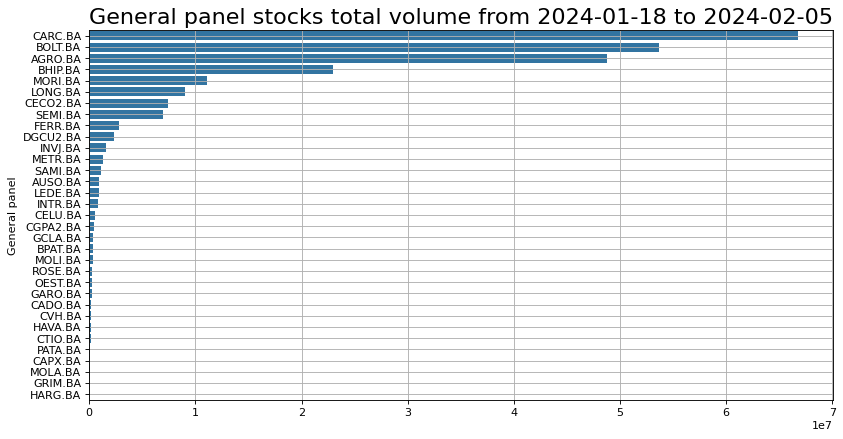

In [103]:
plt.figure(figsize=(12, 6), dpi=80)
plt.title( "General panel stocks total volume from 2024-01-18 to 2024-02-05", fontsize=20)
sns.barplot(generalpanel_period , orient="h").set(ylabel = "General panel")
plt.grid()

([<matplotlib.patches.Wedge at 0x25a5d4b6b40>,
 [Text(0.7130178589830132, 0.8376189663392778, 'CARC.BA'),
  Text(-0.8308505106764525, 0.7208934934570281, 'BOLT.BA'),
  Text(-0.8993016031009012, -0.6334482036126942, 'AGRO.BA'),
  Text(-0.02967795282763542, -1.0995995721697789, 'BHIP.BA'),
  Text(0.44274486630589166, -1.006964241351091, 'MORI.BA'),
  Text(0.6869395325959948, -0.8591356578310531, 'LONG.BA'),
  Text(1.0174651529983136, -0.41804863644571094, 'Others')],
 [Text(0.3889188321725526, 0.45688307254869687, '28%'),
  Text(-0.45319118764170135, 0.39321463279474256, '22%'),
  Text(-0.49052814714594606, -0.3455172019705604, '20%'),
  Text(-0.016187974269619317, -0.5997815848198793, '9%'),
  Text(0.2414971998032136, -0.5492532225551405, '5%'),
  Text(0.3746942905069062, -0.46861944972602887, '4%'),
  Text(0.5549809925445347, -0.22802652897038775, '12%')])

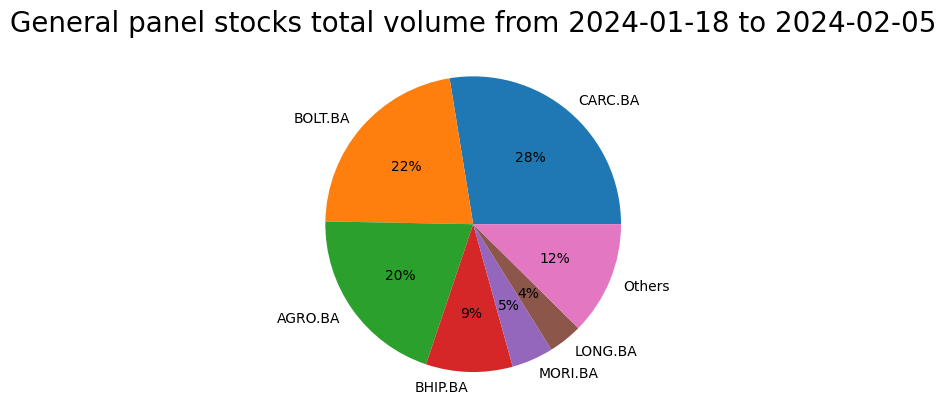

In [104]:
#Pie chart
x = generalpanel_period.sort_values(ascending=False).head(6)
y = pd.Series(index=["Others"] , data= [generalpanel_period.sort_values(ascending=False).tail(len(generalpanel_period)-6).sum()] ).transpose()
data_pie = pd.concat([ x , y] ,axis=0 )

plt.title( "General panel stocks total volume from 2024-01-18 to 2024-02-05", fontsize=20)
plt.pie(data_pie, labels= data_pie.index , autopct='%.0f%%') 

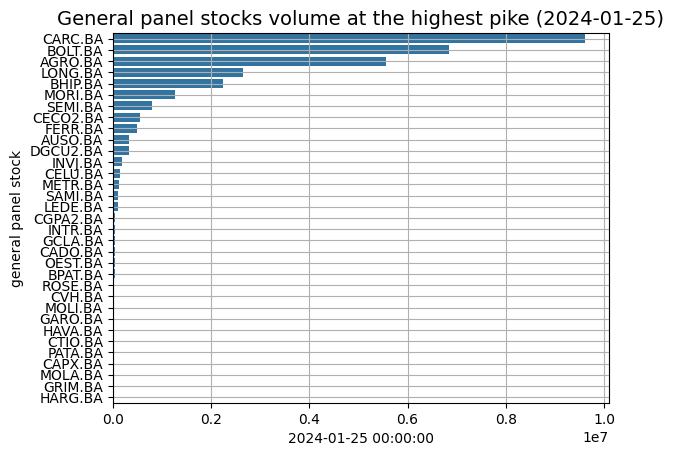

In [105]:
plt.title( "General panel stocks volume at the highest pike (2024-01-25)", fontsize=14)
sns.barplot(generalpanel_at_pike , orient="h" ).set(ylabel = "general panel stock")
plt.grid()

([<matplotlib.patches.Wedge at 0x25a56c78890>,
 [Text(0.6384173073810482, 0.8957808558103552, 'CARC.BA'),
  Text(-0.9314797787269427, 0.5851029155822128, 'BOLT.BA'),
  Text(-0.8638598010040766, -0.6809891659998691, 'AGRO.BA'),
  Text(-0.09862972385277377, -1.0955693394636077, 'LONG.BA'),
  Text(0.4219698338078096, -1.0158451945824274, 'BHIP.BA'),
  Text(0.7418962493303222, -0.8121514361432852, 'MORI.BA'),
  Text(1.0323644135359697, -0.3797679787245543, 'Others')],
 [Text(0.3482276222078444, 0.4886077395329209, '30%'),
  Text(-0.508079879305605, 0.31914704486302514, '22%'),
  Text(-0.4711962550931326, -0.37144863599992856, '18%'),
  Text(-0.053798031192422054, -0.5975832760710587, '8%'),
  Text(0.23016536389516884, -0.5540973788631421, '7%'),
  Text(0.40467068145290297, -0.4429916924417919, '4%'),
  Text(0.5631078619287107, -0.20714617021339324, '11%')])

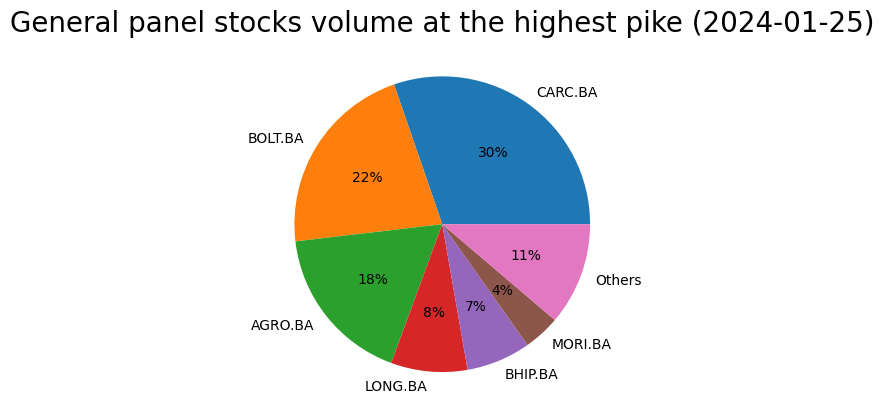

In [106]:
#Pie chart
x = generalpanel_at_pike.sort_values(ascending=False).head(6)
y = pd.Series(index=["Others"] , data= [generalpanel_at_pike.sort_values(ascending=False).tail(len(generalpanel_at_pike)-6).sum()] ).transpose()
data_pie = pd.concat([ x , y] ,axis=0 )

plt.title( "General panel stocks volume at the highest pike (2024-01-25)", fontsize=20)
plt.pie(data_pie, labels= data_pie.index , autopct='%.0f%%') 

Two stocks could have the same volume but their price could go in oposit directions and this could be a clue of capital flow from one group of stocks to another. Now we´ll be checking whether this is the case at the period where stocks out of the general panel were over the general panel looking at the price changes


In [107]:
#Price change for both groups.
leading_panel_close = market_df.Close[leading_panel].pct_change()
general_panel_close = market_df.Close[generalpanel_at_pike.index].pct_change()

#Price change along period for both groups.
general_panel_close_period = leading_panel_close.loc["2024-01-18" : "2024-02-05" , :]
nopanel_close_period= general_panel_close.loc["2024-01-18" : "2024-02-05" , :]

#Price change at the highest pike of the period for both groups.
general_panel_close_pike = leading_panel_close.loc["2024-01-25" , :]
nopanel_close_pike= general_panel_close.loc["2024-01-25" , :]

C:\Users\PC1\AppData\Local\Temp\ipykernel_11088\2209051641.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  general_panel_close = market_df.Close[generalpanel_at_pike.index].pct_change()


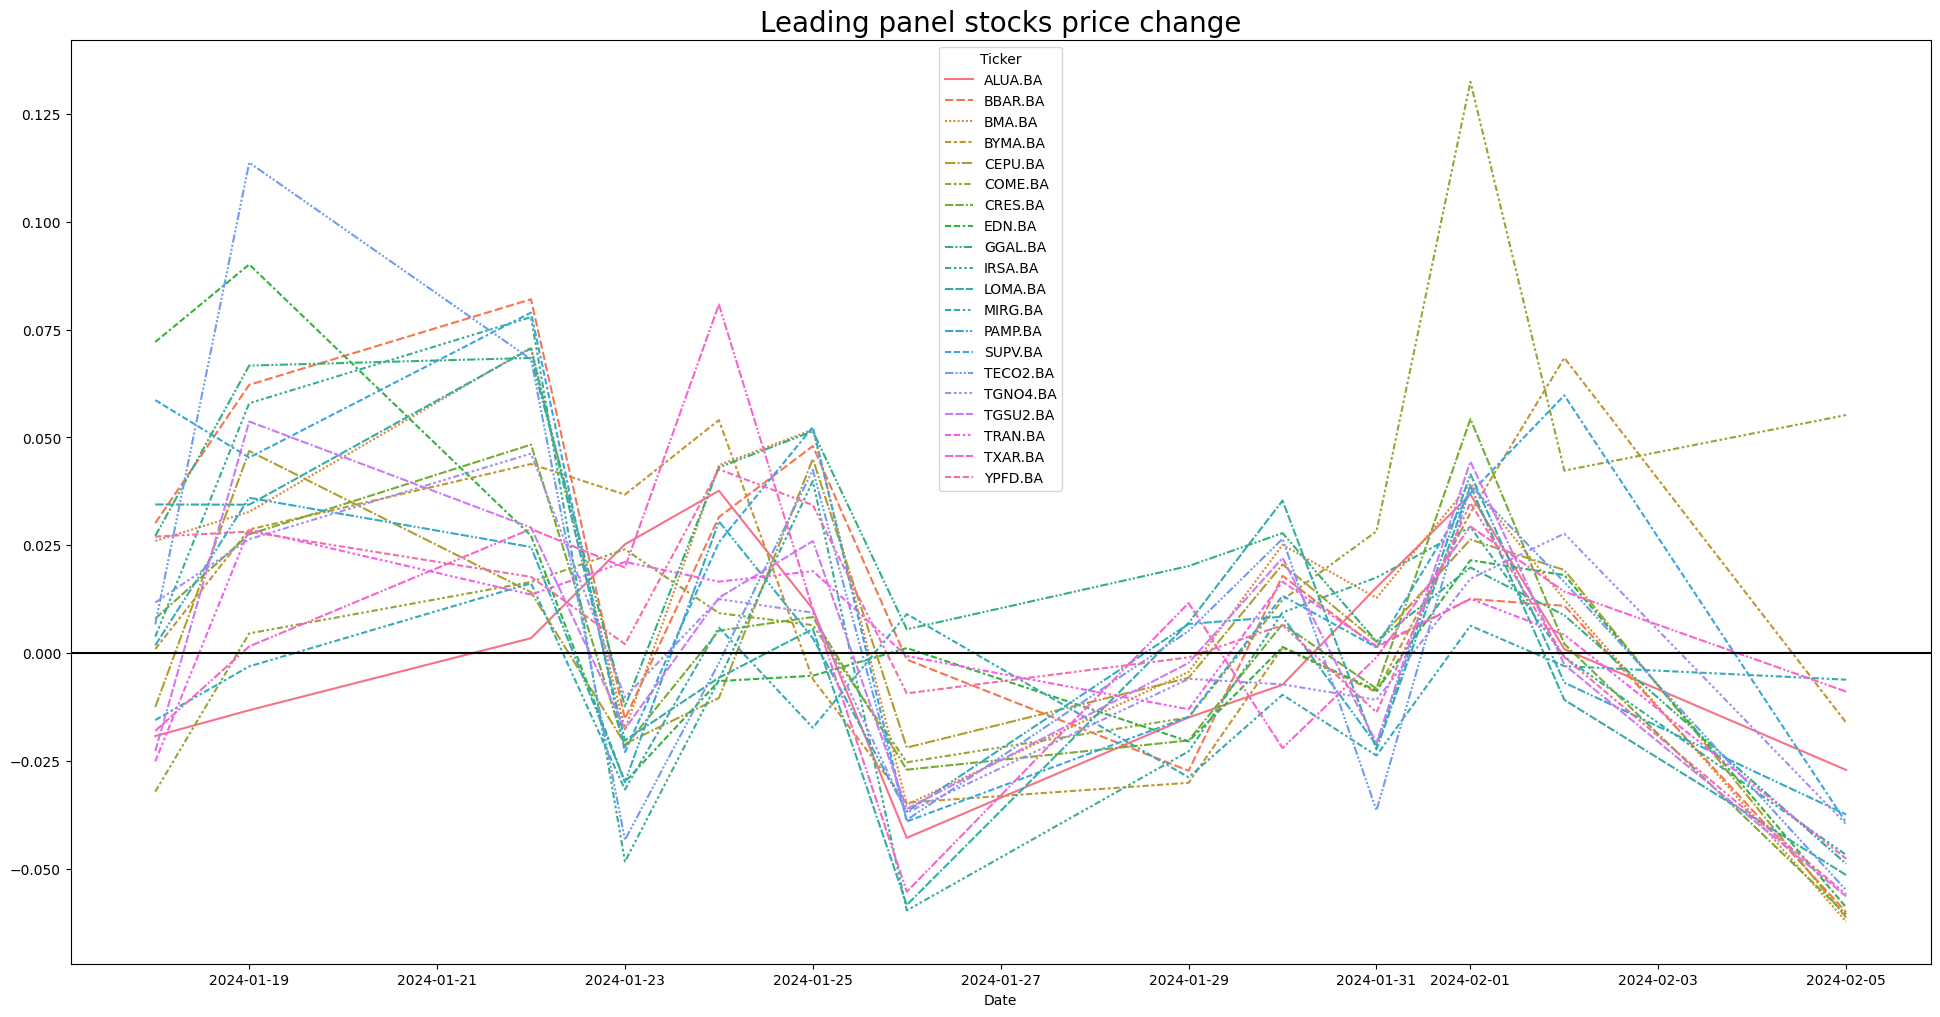

In [108]:
plt.figure(figsize=(24,12))
plt.title( "Leading panel stocks price change", fontsize=20)
sns.lineplot(general_panel_close_period)
plt.axhline( y =0 , color= "k")

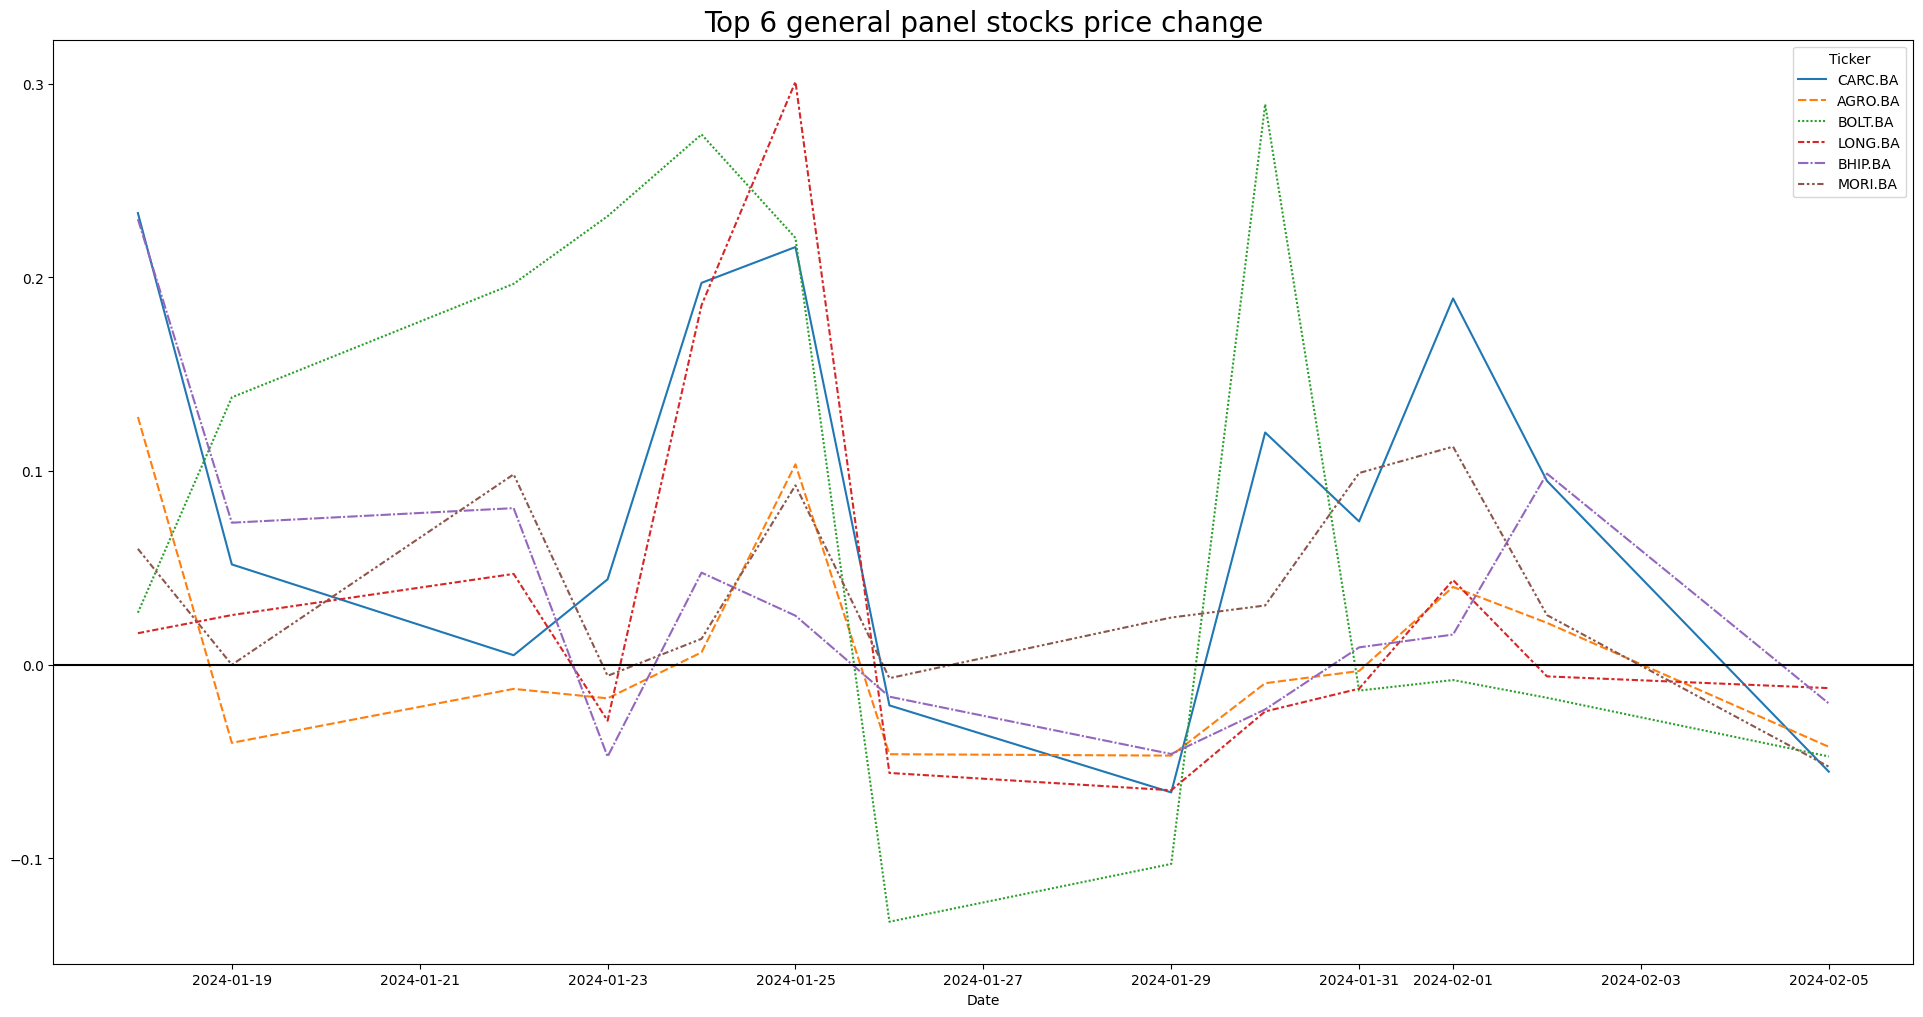

In [109]:
plt.figure(figsize=(24,12))
plt.title( "Top 6 general panel stocks price change", fontsize=20)
sns.lineplot(nopanel_close_period.loc[: , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]])
plt.axhline( y =0 , color= "k")

<Axes: title={'center': 'Correlation of price change (2024-01-18 - 2024-02-05)'}, xlabel='Ticker', ylabel='Ticker'>

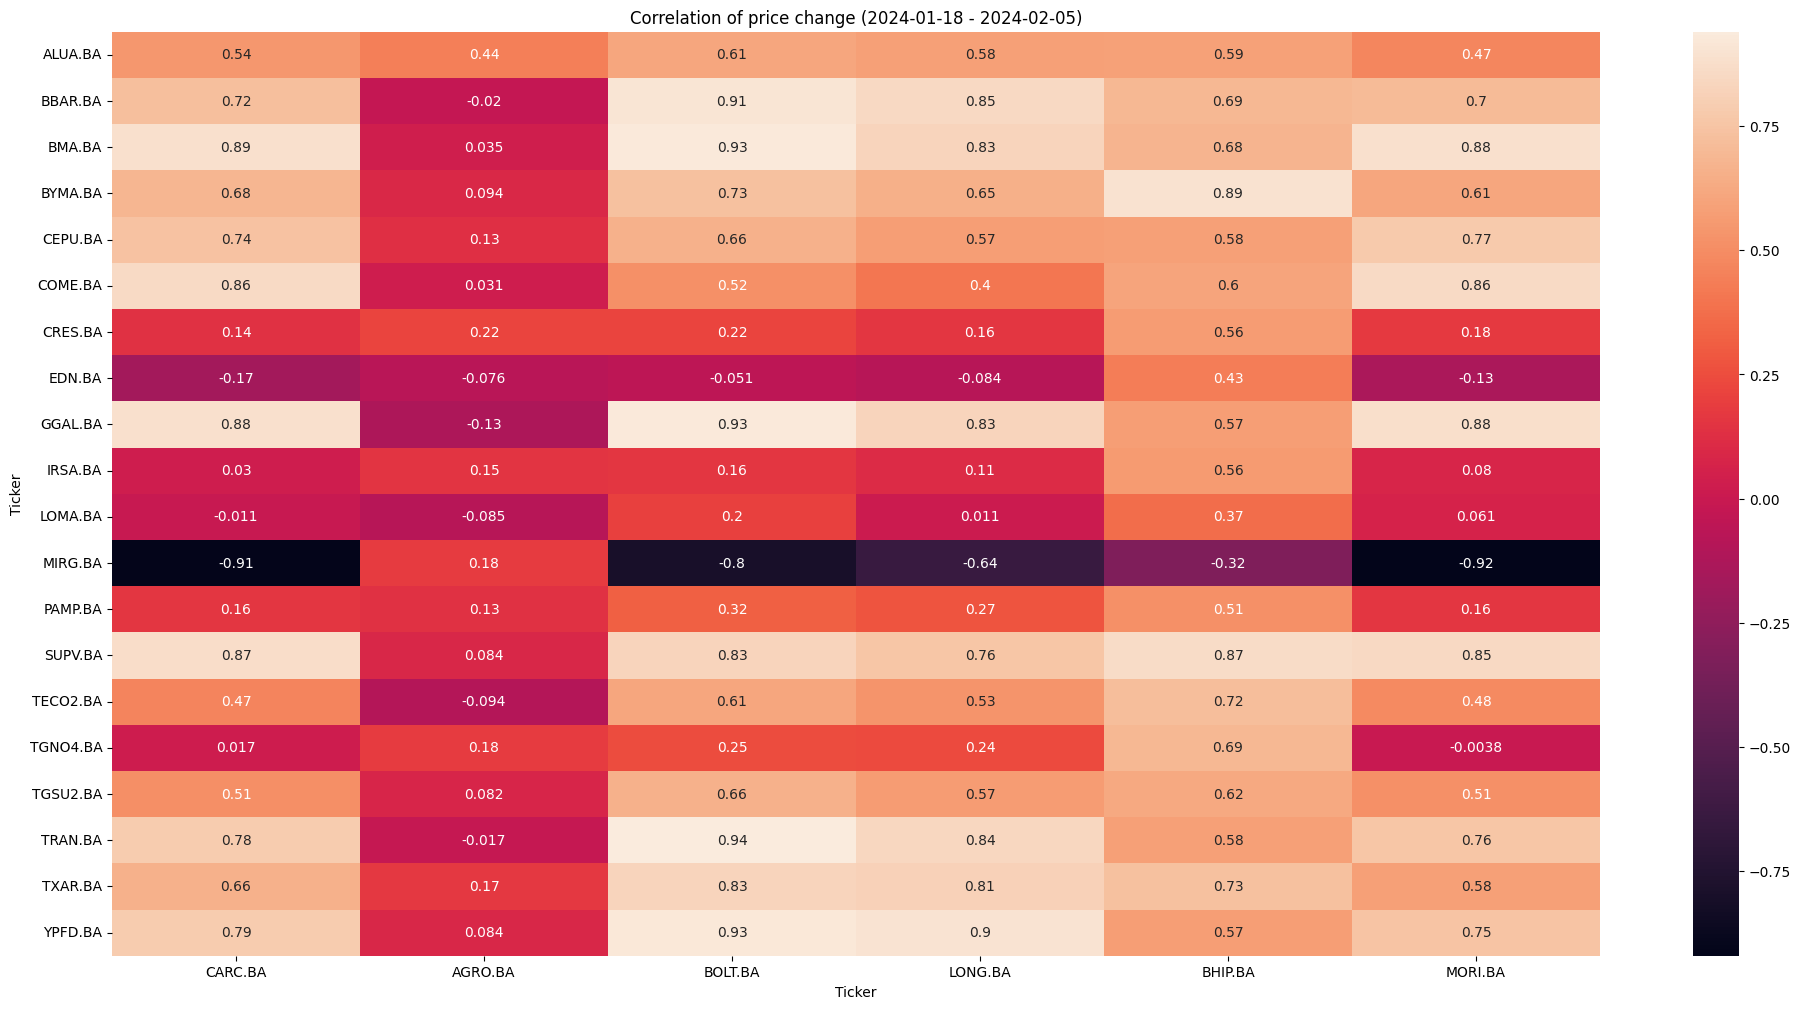

In [110]:
z = leading_panel + list(generalpanel_at_pike.index)
market_corr = market_df.Close.loc["2024-01-18" : "2024-02-05", z].corr().loc[leading_panel , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]]
plt.figure(figsize=(24,12))
plt.title("Correlation of price change (2024-01-18 - 2024-02-05)")
sns.heatmap(market_corr , annot=True)

Overall we can see that there is a positive correlation on price change and volume change as we saw earlier. So we can discard the hipotesis of capital flow from one group of stock to another.

<Axes: title={'center': 'Price change correlation throughout the year'}, xlabel='Ticker', ylabel='Ticker'>

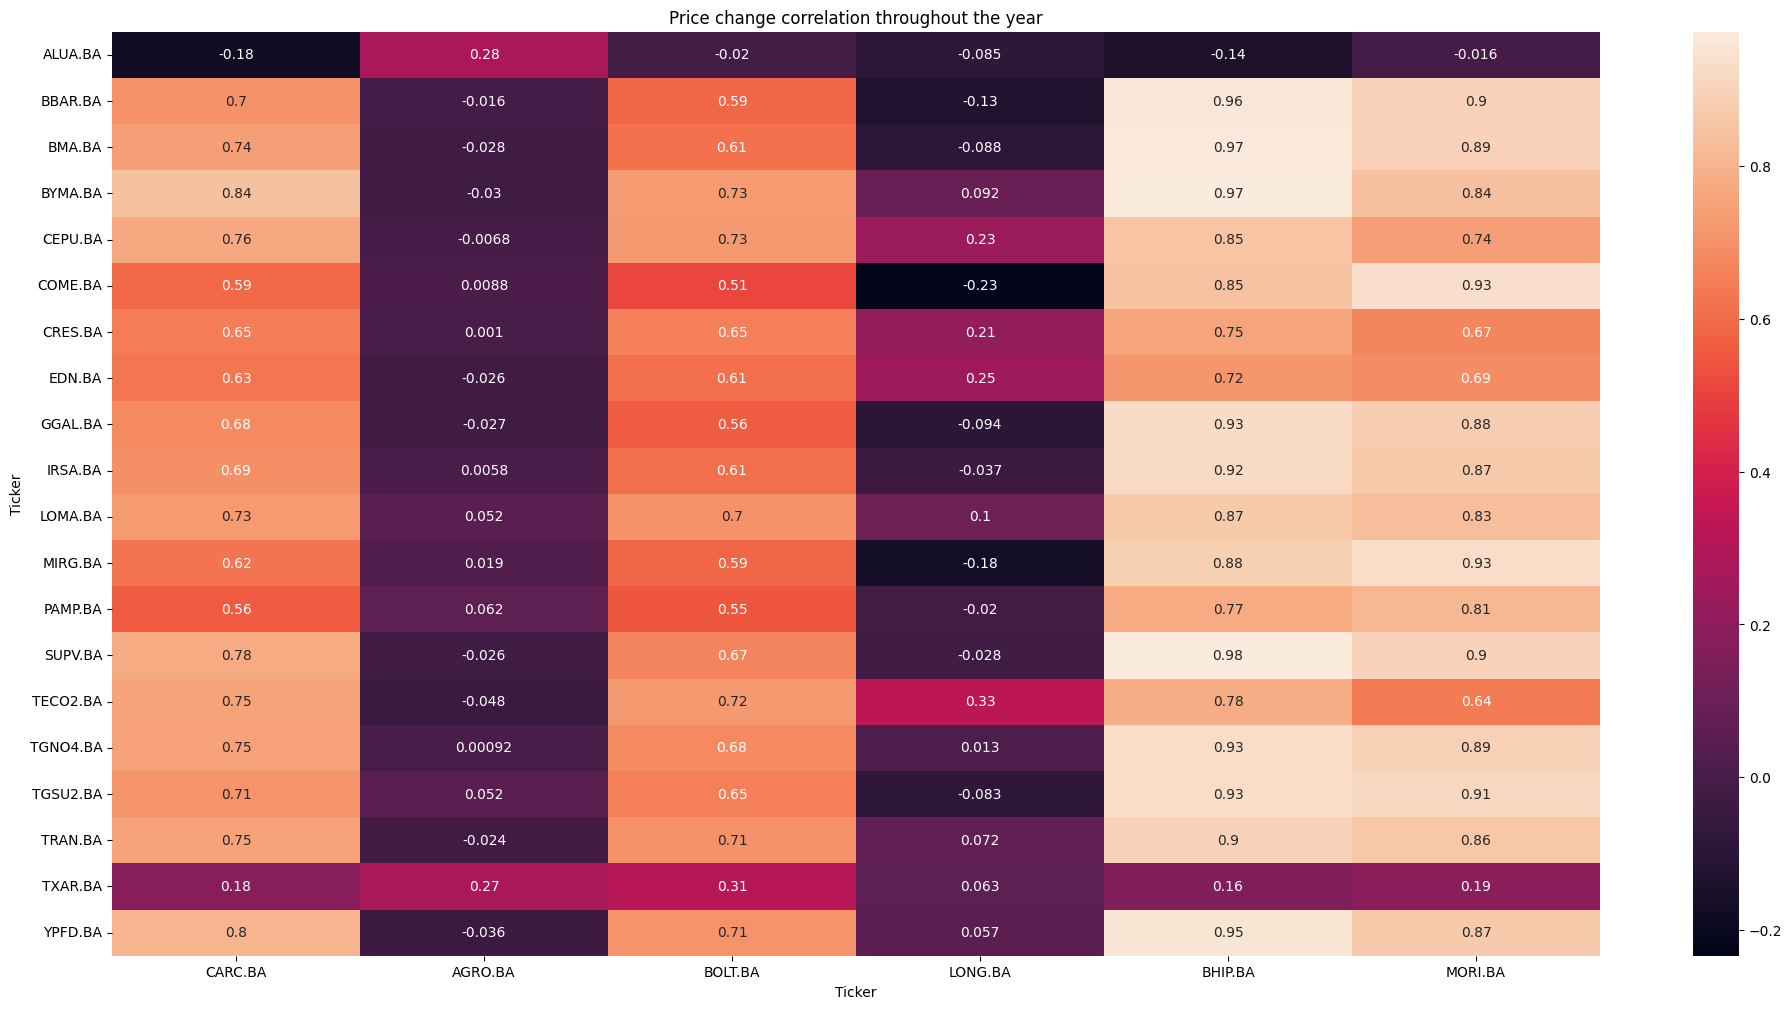

In [111]:
z = leading_panel + list(generalpanel_at_pike.index)
market_corr_y = market_df.Close.loc[:, z].corr().loc[leading_panel , ["CARC.BA" ,"AGRO.BA" ,"BOLT.BA" ,"LONG.BA" , "BHIP.BA","MORI.BA"]]
plt.figure(figsize=(24,12))
plt.title("Price change correlation throughout the year")
sns.heatmap(market_corr_y , annot=True)

<Axes: title={'center': 'Mean correlation difference between year and period'}, xlabel='Ticker'>

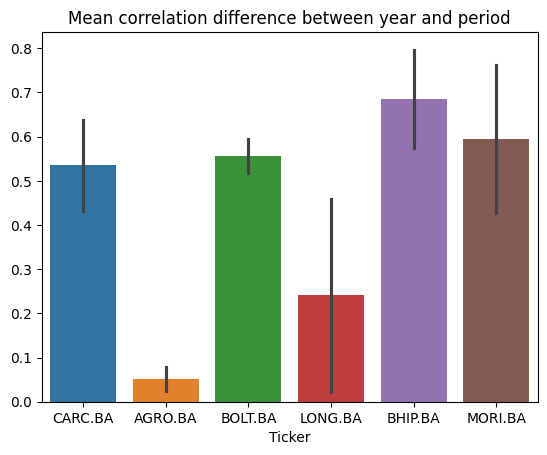

In [112]:
diff_corr = pd.DataFrame({"Year" : market_corr_y.mean() , "Period" :market_corr.mean()})
plt.title("Mean correlation difference between year and period")
sns.barplot(diff_corr.transpose() )

## Observations 

<ul>
<li>Volumes in general have a neutral to positive correlation</li>
<li>Price changes generally have a neutral to positive correlation</li>
<li>There was a period from 2024-01-18 to 2024-02-05 were volume of stocks on general panel exceeded the leading panel</li>
<li>The increase in volume at 2024-01-18 to 2024-02-05 of general panel stocks, were mainly due to CARC , AGRO, BOLT, LONG. BHIP , MORI</li>
<li>AGRO at 2024-01-18 to 2024-02-05 had a neutral to positve correlation with the leading panel unlike to the negative correlation throughou the year</li>
<li>The higest pike at 2024-01-25 in change of volume and price were followed by a profit-taking</li>
<li>Given the correlation of price changes in general there is no evidence of capital flow from one group to another</li>
<li>Correlation Matrices shows interesting relationships between groups of stock for further study</li>
</ul>
